In [1]:
import pandas as pd
import numpy as np

In [2]:
df_iris = pd.read_csv("data/SIREN/StockEtablissementActif_utf8_geo_iris_propre.csv", sep=',')

/home/guera/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_iris=df_iris.astype(str)
df_iris.head(7000000)

siret         IRIS
0         1585094400024    013760000
1         1585094400016    212950000
2         1585179300479    011340000
3         1585179300743    010570000
4         1585179300917    010530604
...                 ...          ...
6999995  51441876300017  955040000.0
6999996  51442072800016  950180402.0
6999997  51442202100014  954760105.0
6999998  51442265800013  955850125.0
6999999  51442342500016  954280202.0

[7000000 rows x 2 columns]

In [4]:
siren_eta_geo = pd.read_csv("data/SIREN/StockEtablissementActif_utf8_geo.csv", sep=',',usecols=["siren", "siret", "activitePrincipaleEtablissement","trancheEffectifsEtablissement"])

/home/guera/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
siren_eta_geo = siren_eta_geo.astype(str)
siren_eta_geo

siren           siret trancheEffectifsEtablissement  \
0          15850944   1585094400024                            11   
1          15851793   1585179300479                            11   
2          15851793   1585179300743                            02   
3          15851793   1585179300917                           nan   
4          16250029   1625002900697                            21   
...             ...             ...                           ...   
11810230  950007575  95000757500018                            NN   
11810231  950051607  95005160700014                           nan   
11810232  950388710  95038871000036                           nan   
11810233  967802745  96780274500034                           nan   
11810234  999990526  99999052600017                            NN   

         activitePrincipaleEtablissement  
0                                 25.73B  
1                                 46.73A  
2                                 46.73A  
3                                 46.73A  
4                                 52.21Z  
...                                  ...  
11810230                          70.22Z  
11810231                          47.59A  
11810232                          43.39Z  
11810233                          68.10Z  
11810234                          73.20Z  

[11810235 rows x 4 columns]

In [6]:
df=pd.merge(df_iris,siren_eta_geo)

In [7]:
df

siret       IRIS      siren trancheEffectifsEtablissement  \
0         1585094400024  013760000   15850944                            11   
1         1585094400016  212950000   15850944                            12   
2         1585179300479  011340000   15851793                            11   
3         1585179300743  010570000   15851793                            02   
4         1585179300917  010530604   15851793                           nan   
...                 ...        ...        ...                           ...   
7383425  88270263200010        nan  882702632                           nan   
7383426  94625069300029        nan  946250693                            NN   
7383427  95000757500018        nan  950007575                            NN   
7383428  95005160700014        nan  950051607                           nan   
7383429  99999052600017        nan  999990526                            NN   

        activitePrincipaleEtablissement  
0                                25.73B  
1                                25.73B  
2                                46.73A  
3                                46.73A  
4                                46.73A  
...                                 ...  
7383425                          56.10C  
7383426                          46.49Z  
7383427                          70.22Z  
7383428                          47.59A  
7383429                          73.20Z  

[7383430 rows x 5 columns]

In [8]:
df=df[(df != 'nan').all(1)]
df=df[df['trancheEffectifsEtablissement'] != 'NN']
df=df[df['trancheEffectifsEtablissement'] != '00']
df=df[df['trancheEffectifsEtablissement'] != '0.0']
df

siret         IRIS      siren trancheEffectifsEtablissement  \
0         1585094400024    013760000   15850944                            11   
1         1585094400016    212950000   15850944                            12   
2         1585179300479    011340000   15851793                            11   
3         1585179300743    010570000   15851793                            02   
5         1585179300537    102950000   15851793                            02   
...                 ...          ...        ...                           ...   
7275746  95063983100011  974110504.0  950639831                            11   
7275747  95063984900039  974110105.0  950639849                            03   
7275749  95064028400028  974130103.0  950640284                            02   
7275750  95064030000022  974160605.0  950640300                            03   
7275751  95064031800032  974080103.0  950640318                            11   

        activitePrincipaleEtablissement  
0                                25.73B  
1                                25.73B  
2                                46.73A  
3                                46.73A  
5                                46.73A  
...                                 ...  
7275746                          46.49Z  
7275747                          46.45Z  
7275749                          43.21A  
7275750                          31.02Z  
7275751                          46.38B  

[1631577 rows x 5 columns]

In [9]:
index=pd.MultiIndex.from_frame(df[['IRIS','activitePrincipaleEtablissement','trancheEffectifsEtablissement','siret']])

In [10]:
index

MultiIndex([(  '013760000', '25.73B', '11',  '1585094400024'),
            (  '212950000', '25.73B', '12',  '1585094400016'),
            (  '011340000', '46.73A', '11',  '1585179300479'),
            (  '010570000', '46.73A', '02',  '1585179300743'),
            (  '102950000', '46.73A', '02',  '1585179300537'),
            (  '103790000', '46.73A', '02',  '1585179300602'),
            (  '182330000', '46.73A', '02',  '1585179300339'),
            (  '211669801', '46.73A', '21',  '1585179300016'),
            (  '211669801', '82.99Z', '22',  '1585179300032'),
            (  '213170000', '46.73A', '12',  '1585179300040'),
            ...
            ('974090104.0', '66.22Z', '02', '95063778500037'),
            ('974180101.0', '46.21Z', '11', '95063826200036'),
            ('974221201.0', '55.10Z', '11', '95063831200013'),
            ('974220501.0', '75.00Z', '03', '95063851000012'),
            ('974111101.0', '18.13Z', '12', '95063875900031'),
            ('974110504.0', '46.49Z', '

In [11]:
index=index.unique()

In [12]:
df=df.set_index(index)

In [13]:
df.loc[('013760000',)]

/home/guera/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


siret  \
activitePrincipaleEtablissement trancheEffectifsEtablissement siret                            
25.73B                          11                            1585094400024    1585094400024   
84.11Z                          21                            21010376800011  21010376800011   
85.20Z                          11                            21010376800029  21010376800029   
85.10Z                          11                            21010376800037  21010376800037   
94.99Z                          03                            30272419000020  30272419000020   
...                                                                                      ...   
47.73Z                          03                            82492189400013  82492189400013   
43.21A                          01                            82775989500010  82775989500010   
55.10Z                          11                            95039659800027  95039659800027   
22.29A                          22                            96950989200028  96950989200028   
64.20Z                          01                            97250353600062  97250353600062   

                                                                                   IRIS  \
activitePrincipaleEtablissement trancheEffectifsEtablissement siret                       
25.73B                          11                            1585094400024   013760000   
84.11Z                          21                            21010376800011  013760000   
85.20Z                          11                            21010376800029  013760000   
85.10Z                          11                            21010376800037  013760000   
94.99Z                          03                            30272419000020  013760000   
...                                                                                 ...   
47.73Z                          03                            82492189400013  013760000   
43.21A                          01                            82775989500010  013760000   
55.10Z                          11                            95039659800027  013760000   
22.29A                          22                            96950989200028  013760000   
64.20Z                          01                            97250353600062  013760000   

                                                                                  siren  \
activitePrincipaleEtablissement trancheEffectifsEtablissement siret                       
25.73B                          11                            1585094400024    15850944   
84.11Z                          21                            21010376800011  210103768   
85.20Z                          11                            21010376800029  210103768   
85.10Z                          11                            21010376800037  210103768   
94.99Z                          03                            30272419000020  302724190   
...                                                                                 ...   
47.73Z                          03                            82492189400013  824921894   
43.21A                          01                            82775989500010  827759895   
55.10Z                          11                            95039659800027  950396598   
22.29A                          22                            96950989200028  969509892   
64.20Z                          01                            97250353600062  972503536   

                                                                             trancheEffectifsEtablissement  \
activitePrincipaleEtablissement trancheEffectifsEtablissement siret                                          
25.73B                          11                            1585094400024                             11   
84.11Z                          21                            21010376800011                            21   
85.20Z                        

In [14]:
df_clap_poste=pd.read_excel("data/CLAP/TD_CLAP2015_NA88_NBSAL.xls")
df_clap_etab=pd.read_excel("data/CLAP/TD_CLAP2015_NA88_NBETAB.xls")
df_clap_poste=df_clap_poste.drop([0,1,2,3])
df_clap_poste.rename(columns=df_clap_poste.iloc[0,:],inplace=True)
df_clap_poste=df_clap_poste.drop([4])

In [15]:
df_clap_etab.drop([0,1,2,3],inplace=True)
df_clap_etab.rename(columns=df_clap_etab.iloc[0,:],inplace=True)
df_clap_etab.drop([4],inplace=True)

In [16]:
df_clap_poste

CODGEO                   LIBGEO  DEP REG EFF_TOT EFF_01 EFF_02 EFF_03  \
5      01001  L'Abergement-Clémenciat   01  84      42      8      0      0   
6      01002    L'Abergement-de-Varey   01  84       4      1      0      0   
7      01004        Ambérieu-en-Bugey   01  84    5231      0      0      0   
8      01005      Ambérieux-en-Dombes   01  84     148      3      0      0   
9      01006                  Ambléon   01  84       0      0      0      0   
...      ...                      ...  ...  ..     ...    ...    ...    ...   
36683  97420           Sainte-Suzanne  974  04    3732     93      0      0   
36684  97421                  Salazie  974  04     901     65      0      0   
36685  97422                Le Tampon  974  04   12032    297      0      0   
36686  97423        Les Trois-Bassins  974  04     781      5      0      0   
36687  97424                   Cilaos  974  04     923      3      0      0   

      EFF_05 EFF_06  ... EFF_90 EFF_91 EFF_92 EFF_93 EFF_94 EFF_95 EFF_96  \
5          0      0  ...      0      0      0      0      1      0      0   
6          0      0  ...      0      0      0      0      0      0      0   
7          0      0  ...      1      2      0     44     32      0     58   
8          0      0  ...      0      0      0      2      6      0      4   
9          0      0  ...      0      0      0      0      0      0      0   
...      ...    ...  ...    ...    ...    ...    ...    ...    ...    ...   
36683      0      0  ...      0      0      0     18     36      0     16   
36684      0      0  ...      2      0      0      1     42      0      1   
36685      0      0  ...     30     40     14    143    238      2    108   
36686      0      0  ...      0      0      0      2     59      0      2   
36687      0      0  ...      0      0      0     15      8      0     30   

      EFF_97 EFF_98 EFF_99  
5          0      0      0  
6          0      0      0  
7          0      0      0  
8          0      0      0  
9          0      0      0  
...      ...    ...    ...  
36683      0      0      0  
36684      0      0      0  
36685      0      0      0  
36686      0      0      0  
36687      0      0      0  

[36683 rows x 93 columns]

In [17]:
df_sdes=pd.read_csv("data/SDES/donnees_elec_iris_2018.csv", sep=';', encoding='latin-1')
df_sdes

OPERATEUR  ANNEE FILIERE  CODE_IRIS  \
0                       Enedis   2018       E  010010000   
1                       Enedis   2018       E  010010000   
2                       Enedis   2018       E  010010000   
3                       Enedis   2018       E  010010000   
4                       Enedis   2018       E  010010000   
...                        ...    ...     ...        ...   
463175  Electricité de Mayotte   2018       E  97617XXXX   
463176  Electricité de Mayotte   2018       E  97617XXXX   
463177  Electricité de Mayotte   2018       E  97617XXXX   
463178  Electricité de Mayotte   2018       E  97617XXXX   
463179  Electricité de Mayotte   2018       E  97617XXXX   

       CODE_CATEGORIE_CONSOMMATION  CODE_SECTEUR_NAF2 CODE_GRAND_SECTEUR  \
0                              PRO                NaN                  A   
1                              PRO                NaN                  I   
2                              ENT               10.0                  I   
3                              RES                NaN                  R   
4                              PRO                NaN                  T   
...                            ...                ...                ...   
463175                     ENT_PRO                NaN                  A   
463176                     ENT_PRO                NaN                  I   
463177                         RES                NaN                  R   
463178                     ENT_PRO                NaN                  T   
463179                     ENT_PRO                NaN                  X   

                     CONSO   PDL  INDQUAL THERMOR PART  
0       271,25121416552786     9  0,45104     NaN  NaN  
1                        s     s      NaN     NaN  NaN  
2        46,63828065665188     1  0,91765     NaN  NaN  
3       2474,6881391654245   346   0,4933     NaN  NaN  
4       186,81175014015294    17  0,54212     NaN  NaN  
...                    ...   ...      ...     ...  ...  
463175              57,859     9      NaN     NaN  NaN  
463176            4011,433     7      NaN     NaN  NaN  
463177           7867,8713  1983      NaN     NaN  NaN  
463178            1880,762    49      NaN     NaN  NaN  
463179             1460,79   184      NaN     NaN  NaN  

[463180 rows x 12 columns]

In [18]:
df_sdes.dropna(subset=['CODE_SECTEUR_NAF2'],inplace=True)
df_sdes

OPERATEUR  ANNEE FILIERE  CODE_IRIS CODE_CATEGORIE_CONSOMMATION  \
2         Enedis   2018       E  010010000                         ENT   
5         Enedis   2018       E  010010000                         ENT   
12        Enedis   2018       E  010040101                         ENT   
13        Enedis   2018       E  010040101                         ENT   
14        Enedis   2018       E  010040101                         ENT   
...          ...    ...     ...        ...                         ...   
459691    Enedis   2018       E  956800114                         ENT   
459693    Enedis   2018       E  95680xxxx                         ENT   
459699    Enedis   2018       E  956820000                         ENT   
459702    Enedis   2018       E  956900000                         ENT   
459706    Enedis   2018       E  956900000                         ENT   

        CODE_SECTEUR_NAF2 CODE_GRAND_SECTEUR               CONSO PDL  INDQUAL  \
2                    10.0                  I   46,63828065665188   1  0,91765   
5                    84.0                  T            211,3135   2  0,99999   
12                   10.0                  I  1096,8468237457502   2  0,91941   
13                   18.0                  I   61,78001135694118   1  0,90459   
14                   25.0                  I  2150,3220743960186   5  0,96231   
...                   ...                ...                 ...  ..      ...   
459691               84.0                  T    158,849073746517   2  0,93317   
459693               43.0                  I   48,08100404793263   2  0,73612   
459699               45.0                  T  23,160166666666669   1  0,99999   
459702                1.0                  A  45,394166666666667   1  0,99999   
459706               36.0                  T   6,934833333333333   1  0,99999   

       THERMOR PART  
2          NaN  NaN  
5          NaN  NaN  
12         NaN  NaN  
13         NaN  NaN  
14         NaN  NaN  
...        ...  ...  
459691     NaN  NaN  
459693     NaN  NaN  
459699     NaN  NaN  
459702     NaN  NaN  
459706     NaN  NaN  

[244728 rows x 12 columns]

In [19]:
df_sdes.set_index('OPERATEUR',inplace=True)
df_sdes.drop(index='RTE',inplace=True)
df_sdes

ANNEE FILIERE  CODE_IRIS CODE_CATEGORIE_CONSOMMATION  \
OPERATEUR                                                         
Enedis      2018       E  010010000                         ENT   
Enedis      2018       E  010010000                         ENT   
Enedis      2018       E  010040101                         ENT   
Enedis      2018       E  010040101                         ENT   
Enedis      2018       E  010040101                         ENT   
...          ...     ...        ...                         ...   
Enedis      2018       E  956800114                         ENT   
Enedis      2018       E  95680xxxx                         ENT   
Enedis      2018       E  956820000                         ENT   
Enedis      2018       E  956900000                         ENT   
Enedis      2018       E  956900000                         ENT   

           CODE_SECTEUR_NAF2 CODE_GRAND_SECTEUR               CONSO PDL  \
OPERATEUR                                                                 
Enedis                  10.0                  I   46,63828065665188   1   
Enedis                  84.0                  T            211,3135   2   
Enedis                  10.0                  I  1096,8468237457502   2   
Enedis                  18.0                  I   61,78001135694118   1   
Enedis                  25.0                  I  2150,3220743960186   5   
...                      ...                ...                 ...  ..   
Enedis                  84.0                  T    158,849073746517   2   
Enedis                  43.0                  I   48,08100404793263   2   
Enedis                  45.0                  T  23,160166666666669   1   
Enedis                   1.0                  A  45,394166666666667   1   
Enedis                  36.0                  T   6,934833333333333   1   

           INDQUAL THERMOR PART  
OPERATEUR                        
Enedis     0,91765     NaN  NaN  
Enedis     0,99999     NaN  NaN  
Enedis     0,91941     NaN  NaN  
Enedis     0,90459     NaN  NaN  
Enedis     0,96231     NaN  NaN  
...            ...     ...  ...  
Enedis     0,93317     NaN  NaN  
Enedis     0,73612     NaN  NaN  
Enedis     0,99999     NaN  NaN  
Enedis     0,99999     NaN  NaN  
Enedis     0,99999     NaN  NaN  

[243684 rows x 11 columns]

In [20]:
index_bis=pd.MultiIndex.from_frame(df_sdes[['CODE_SECTEUR_NAF2','CODE_IRIS']])

In [21]:
df_sdes.set_index(index_bis,inplace=True)

In [22]:
df_sdes.sort_index(inplace=True)

In [23]:
df_sdes.loc[(1.0,)]

ANNEE FILIERE  CODE_IRIS CODE_CATEGORIE_CONSOMMATION  \
CODE_IRIS                                                         
010070000   2018       E  010070000                         ENT   
010150000   2018       E  010150000                         ENT   
010250000   2018       E  010250000                         ENT   
010270000   2018       E  010270000                         ENT   
010320000   2018       E  010320000                         ENT   
...          ...     ...        ...                         ...   
956250000   2018       E  956250000                         ENT   
956560000   2018       E  956560000                         ENT   
956600000   2018       E  956600000                         ENT   
956750000   2018       E  956750000                         ENT   
956900000   2018       E  956900000                         ENT   

           CODE_SECTEUR_NAF2 CODE_GRAND_SECTEUR               CONSO PDL  \
CODE_IRIS                                                                 
010070000                1.0                  A   682,4726344947445   7   
010150000                1.0                  A  214,26701818085827   3   
010250000                1.0                  A   485,9948200898748   6   
010270000                1.0                  A  131,56483575625148   3   
010320000                1.0                  A  154,54711468497895   2   
...                      ...                ...                 ...  ..   
956250000                1.0                  A   26,28169183199141   1   
956560000                1.0                  A    34,3579270080776   1   
956600000                1.0                  A  106,05683333333333   1   
956750000                1.0                  A    963,849411596735   2   
956900000                1.0                  A  45,394166666666667   1   

           INDQUAL THERMOR PART  
CODE_IRIS                        
010070000  0,97231     NaN  NaN  
010150000  0,92601     NaN  NaN  
010250000  0,94475     NaN  NaN  
010270000  0,99496     NaN  NaN  
010320000  0,98105     NaN  NaN  
...            ...     ...  ...  
956250000  0,99902     NaN  NaN  
956560000  0,99999     NaN  NaN  
956600000  0,99999     NaN  NaN  
956750000  0,90268     NaN  NaN  
956900000  0,99999     NaN  NaN  

[10583 rows x 11 columns]

In [24]:
df_sdes['CODE_COMMUNE']=df_sdes['CODE_IRIS'].str.slice(stop=5)

In [25]:
df_sdes

ANNEE FILIERE  CODE_IRIS  \
CODE_SECTEUR_NAF2 CODE_IRIS                             
1.0               010070000   2018       E  010070000   
                  010150000   2018       E  010150000   
                  010250000   2018       E  010250000   
                  010270000   2018       E  010270000   
                  010320000   2018       E  010320000   
...                            ...     ...        ...   
99.0              954280303   2018       E  954280303   
                  954520000   2018       E  954520000   
                  954890000   2018       E  954890000   
                  955270000   2018       E  955270000   
                  956510000   2018       E  956510000   

                            CODE_CATEGORIE_CONSOMMATION  CODE_SECTEUR_NAF2  \
CODE_SECTEUR_NAF2 CODE_IRIS                                                  
1.0               010070000                         ENT                1.0   
                  010150000                         ENT                1.0   
                  010250000                         ENT                1.0   
                  010270000                         ENT                1.0   
                  010320000                         ENT                1.0   
...                                                 ...                ...   
99.0              954280303                         ENT               99.0   
                  954520000                         ENT               99.0   
                  954890000                         ENT               99.0   
                  955270000                         ENT               99.0   
                  956510000                         ENT               99.0   

                            CODE_GRAND_SECTEUR               CONSO PDL  \
CODE_SECTEUR_NAF2 CODE_IRIS                                              
1.0               010070000                  A   682,4726344947445   7   
                  010150000                  A  214,26701818085827   3   
                  010250000                  A   485,9948200898748   6   
                  010270000                  A  131,56483575625148   3   
                  010320000                  A  154,54711468497895   2   
...                                        ...                 ...  ..   
99.0              954280303                  T  15,179941084495515   1   
                  954520000                  T  128,93366666666667   1   
                  954890000                  T   73,50756285425315   1   
                  955270000                  T   63,80125444275686   1   
                  956510000                  T   39,25918642977219   1   

                             INDQUAL THERMOR PART CODE_COMMUNE  
CODE_SECTEUR_NAF2 CODE_IRIS                                     
1.0               010070000  0,97231     NaN  NaN        01007  
                  010150000  0,92601     NaN  NaN        01015  
                  010250000  0,94475     NaN  NaN        01025  
                  010270000  0,99496     NaN  NaN        01027  
                  010320000  0,98105     NaN  NaN        01032  
...                              ...     ...  ...          ...  
99.0              954280303  0,90827     NaN  NaN        95428  
                  954520000  0,99999     NaN  NaN        95452  
                  954890000   0,8044     NaN  NaN        95489  
                  955270000  0,70142     NaN  NaN        95527  
                  956510000  0,91987     NaN  NaN        95651  

[243684 rows x 12 columns]

In [26]:
index_bis=pd.MultiIndex.from_frame(df_sdes[['CODE_SECTEUR_NAF2','CODE_COMMUNE']])
df_sdes.set_index(index_bis,inplace=True)
df_sdes

ANNEE FILIERE  CODE_IRIS  \
CODE_SECTEUR_NAF2 CODE_COMMUNE                             
1.0               01007          2018       E  010070000   
                  01015          2018       E  010150000   
                  01025          2018       E  010250000   
                  01027          2018       E  010270000   
                  01032          2018       E  010320000   
...                               ...     ...        ...   
99.0              95428          2018       E  954280303   
                  95452          2018       E  954520000   
                  95489          2018       E  954890000   
                  95527          2018       E  955270000   
                  95651          2018       E  956510000   

                               CODE_CATEGORIE_CONSOMMATION  CODE_SECTEUR_NAF2  \
CODE_SECTEUR_NAF2 CODE_COMMUNE                                                  
1.0               01007                                ENT                1.0   
                  01015                                ENT                1.0   
                  01025                                ENT                1.0   
                  01027                                ENT                1.0   
                  01032                                ENT                1.0   
...                                                    ...                ...   
99.0              95428                                ENT               99.0   
                  95452                                ENT               99.0   
                  95489                                ENT               99.0   
                  95527                                ENT               99.0   
                  95651                                ENT               99.0   

                               CODE_GRAND_SECTEUR               CONSO PDL  \
CODE_SECTEUR_NAF2 CODE_COMMUNE                                              
1.0               01007                         A   682,4726344947445   7   
                  01015                         A  214,26701818085827   3   
                  01025                         A   485,9948200898748   6   
                  01027                         A  131,56483575625148   3   
                  01032                         A  154,54711468497895   2   
...                                           ...                 ...  ..   
99.0              95428                         T  15,179941084495515   1   
                  95452                         T  128,93366666666667   1   
                  95489                         T   73,50756285425315   1   
                  95527                         T   63,80125444275686   1   
                  95651                         T   39,25918642977219   1   

                                INDQUAL THERMOR PART CODE_COMMUNE  
CODE_SECTEUR_NAF2 CODE_COMMUNE                                     
1.0               01007         0,97231     NaN  NaN        01007  
                  01015         0,92601     NaN  NaN        01015  
                  01025         0,94475     NaN  NaN        01025  
                  01027         0,99496     NaN  NaN        01027  
                  01032         0,98105     NaN  NaN        01032  
...                                 ...     ...  ...          ...  
99.0              95428         0,90827     NaN  NaN        95428  
                  95452         0,99999     NaN  NaN        95452  
                  95489          0,8044     NaN  NaN        95489  
                  95527         0,70142     NaN  NaN        95527  
                  95651         0,91987     NaN  NaN        95651  

[243684 rows x 12 columns]

In [27]:
df_sdes['CONSO']= df_sdes['CONSO'].str.replace(',', '.')
df_sdes['CONSO']=pd.to_numeric(df_sdes['CONSO'])

In [28]:
df_conso=df_sdes[['CONSO']]
df_conso

CONSO
CODE_SECTEUR_NAF2 CODE_COMMUNE            
1.0               01007         682.472634
                  01015         214.267018
                  01025         485.994820
                  01027         131.564836
                  01032         154.547115
...                                    ...
99.0              95428          15.179941
                  95452         128.933667
                  95489          73.507563
                  95527          63.801254
                  95651          39.259186

[243684 rows x 1 columns]

In [29]:
df_conso=df_conso.groupby(['CODE_SECTEUR_NAF2','CODE_COMMUNE']).sum()

In [30]:
df_conso.loc[(1.0,)]['CONSO'].max()

35703.20116666667

In [31]:
conso_group=[0.,50.,100.,150.,200.,250.,300.,350.,400.,450.,500.,550.,600.,650.,700.,750.,800.,850.,900.,950.,1000.]
conso_group_names=['0-50','50-100','100-150','150-200','200-250','250-300','300-350','350-400','400-450','450-500','500-550','550-600','600-650','650-700','700-750','750-800','800-850','850-900','900-950','950-1000']
df_conso['CONSO_GROUPE'] = pd.cut(df_conso['CONSO'], bins=conso_group, labels=conso_group_names)

In [32]:
df_conso

CONSO CONSO_GROUPE
CODE_SECTEUR_NAF2 CODE_COMMUNE                         
1.0               01007         682.472634      650-700
                  01015         214.267018      200-250
                  01025         485.994820      450-500
                  01027         131.564836      100-150
                  01032         154.547115      150-200
...                                    ...          ...
99.0              95428          15.179941         0-50
                  95452         128.933667      100-150
                  95489          73.507563       50-100
                  95527          63.801254       50-100
                  95651          39.259186         0-50

[154796 rows x 2 columns]

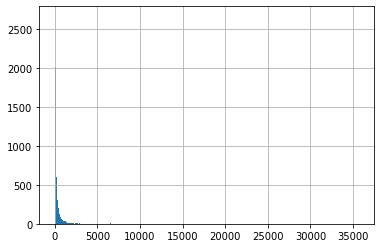

In [33]:
df_conso.loc[(1.0,)]['CONSO'].hist(bins=700)

In [34]:
df_conso.loc[(1.0,)]['CONSO_GROUPE'].value_counts()

0-50        2610
50-100      1991
100-150     1234
150-200      803
200-250      603
250-300      439
300-350      312
350-400      272
400-450      203
450-500      198
500-550      148
550-600      128
600-650       91
650-700       88
700-750       74
850-900       64
750-800       63
800-850       63
950-1000      51
900-950       47
Name: CONSO_GROUPE, dtype: int64

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([2.656e+03, 2.009e+03, 1.229e+03, 8.020e+02, 6.000e+02, 4.290e+02,
        3.070e+02, 2.610e+02, 2.090e+02, 1.910e+02, 1.490e+02, 1.220e+02,
        9.800e+01, 8.200e+01, 7.100e+01, 5.900e+01, 7.500e+01, 5.500e+01,
        4.500e+01, 5.700e+01, 3.200e+01, 3.600e+01, 3.100e+01, 3.200e+01,
        3.100e+01, 2.300e+01, 2.600e+01, 2.300e+01, 2.800e+01, 1.600e+01,
        2.300e+01, 1.500e+01, 1.700e+01, 1.400e+01, 1.100e+01, 6.000e+00,
        9.000e+00, 6.000e+00, 6.000e+00, 1.100e+01, 6.000e+00, 1.200e+01,
        8.000e+00, 5.000e+00, 5.000e+00, 3.000e+00, 5.000e+00, 7.000e+00,
        4.000e+00, 4.000e+00, 6.000e+00, 4.000e+00, 4.000e+00, 4.000e+00,
        2.000e+00, 3.000e+00, 7.000e+00, 5.000e+00, 8.000e+00, 3.000e+00,
        4.000e+00, 1.000e+00, 2.000e+00, 4.000e+00, 1.000e+00, 2.000e+00,
        1.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 2.000e+00, 0.000e+00,
        1.000e+00, 3.000e+00, 1.000e+00, 2.000e+00, 3.000e+00, 1.000e+00,
        2.000e+00, 2.000e+00, 3.000e+0

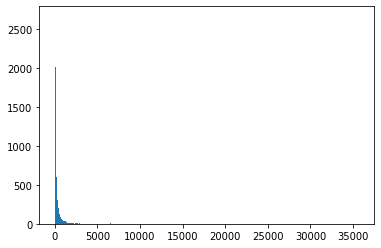

In [36]:
plt.hist(df_conso.loc[(1.0,)]['CONSO'],bins=700)

In [37]:
df_clap_poste.set_index('CODGEO',inplace=True)

In [38]:
df_clap_poste.drop(['LIBGEO','DEP','REG','EFF_TOT'],axis=1,inplace=True)

In [39]:
NAF=df_sdes['CODE_SECTEUR_NAF2'].unique()
NAF_CLAP=np.array(df_clap_poste.columns)
d=dict((NAF_CLAP[i],NAF[i]) for i in range(len(NAF)))
d

{'EFF_01': 1.0,
 'EFF_02': 2.0,
 'EFF_03': 3.0,
 'EFF_05': 5.0,
 'EFF_06': 6.0,
 'EFF_07': 7.0,
 'EFF_08': 8.0,
 'EFF_09': 9.0,
 'EFF_10': 10.0,
 'EFF_11': 11.0,
 'EFF_12': 12.0,
 'EFF_13': 13.0,
 'EFF_14': 14.0,
 'EFF_15': 15.0,
 'EFF_16': 16.0,
 'EFF_17': 17.0,
 'EFF_18': 18.0,
 'EFF_19': 19.0,
 'EFF_20': 20.0,
 'EFF_21': 21.0,
 'EFF_22': 22.0,
 'EFF_23': 23.0,
 'EFF_24': 24.0,
 'EFF_25': 25.0,
 'EFF_26': 26.0,
 'EFF_27': 27.0,
 'EFF_28': 28.0,
 'EFF_29': 29.0,
 'EFF_30': 30.0,
 'EFF_31': 31.0,
 'EFF_32': 32.0,
 'EFF_33': 33.0,
 'EFF_35': 35.0,
 'EFF_36': 36.0,
 'EFF_37': 37.0,
 'EFF_38': 38.0,
 'EFF_39': 39.0,
 'EFF_41': 41.0,
 'EFF_42': 42.0,
 'EFF_43': 43.0,
 'EFF_45': 45.0,
 'EFF_46': 46.0,
 'EFF_47': 47.0,
 'EFF_49': 49.0,
 'EFF_50': 50.0,
 'EFF_51': 51.0,
 'EFF_52': 52.0,
 'EFF_53': 53.0,
 'EFF_55': 55.0,
 'EFF_56': 56.0,
 'EFF_58': 58.0,
 'EFF_59': 59.0,
 'EFF_60': 60.0,
 'EFF_61': 61.0,
 'EFF_62': 62.0,
 'EFF_63': 63.0,
 'EFF_64': 64.0,
 'EFF_65': 65.0,
 'EFF_66': 66.0,
 'EFF

In [40]:
df_clap_poste.rename(columns=d,inplace=True)

In [41]:
s_clap=df_clap_poste.transpose().stack()

In [42]:
s_clap

      CODGEO
1.0   01001     8
      01002     1
      01004     0
      01005     3
      01006     0
               ..
99.0  97420     0
      97421     0
      97422     0
      97423     0
      97424     0
Length: 3228104, dtype: object

In [43]:
df_conso['EFFECTIF']=s_clap

In [44]:
df_conso_bis=df_conso[(df_conso != 0).all(1)]

In [45]:
df_conso_bis['X']=df_conso_bis['CONSO']/df_conso_bis['EFFECTIF']

/home/guera/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [46]:
df_conso_bis

CONSO CONSO_GROUPE EFFECTIF        X
CODE_SECTEUR_NAF2 CODE_COMMUNE                                             
1.0               01007           682.472634      650-700        8  85.3091
                  01025           485.994820      450-500       40  12.1499
                  01027           131.564836      100-150        3  43.8549
                  01038           116.199432      100-150        4  29.0499
                  01040           177.293526      150-200        2  88.6468
...                                      ...          ...      ...      ...
99.0              75116         25679.292650          NaN     1229  20.8945
                  75117          1121.884019          NaN      224  5.00841
                  92025           171.318294      150-200       14   12.237
                  92051          1832.854325          NaN       18  101.825
                  93055            98.153614       50-100       15  6.54357

[126184 rows x 4 columns]

/home/guera/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


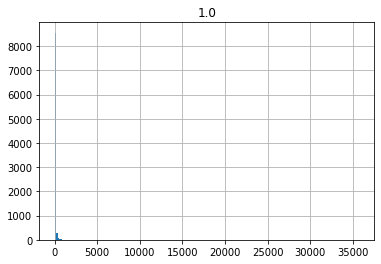

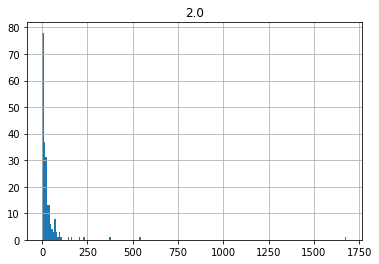

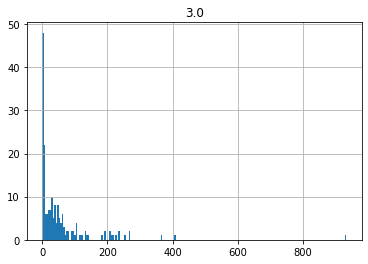

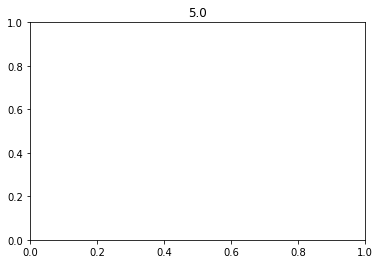

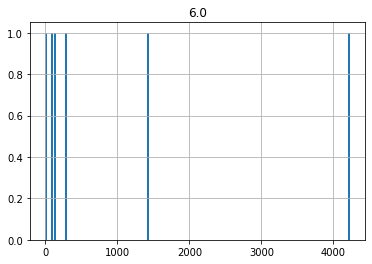

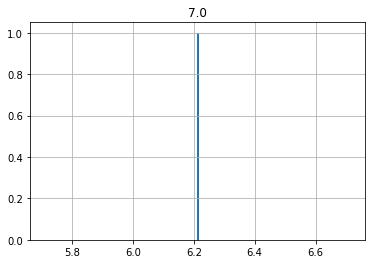

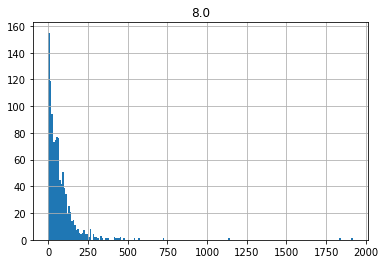

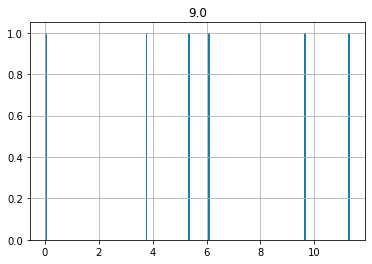

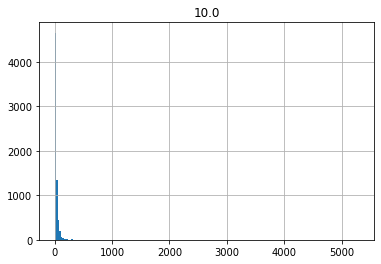

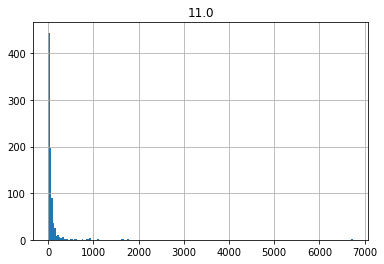

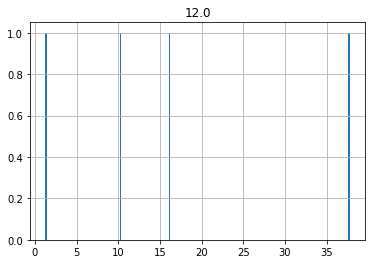

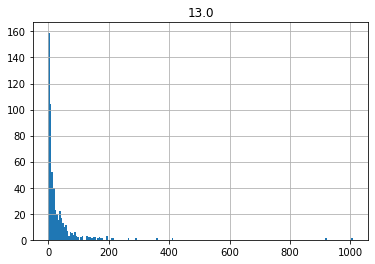

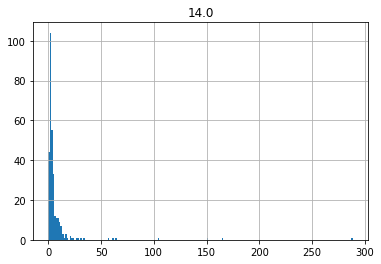

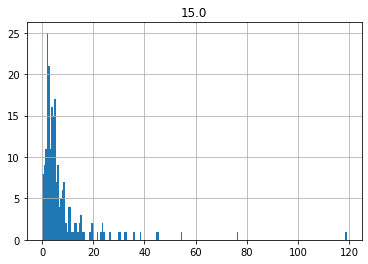

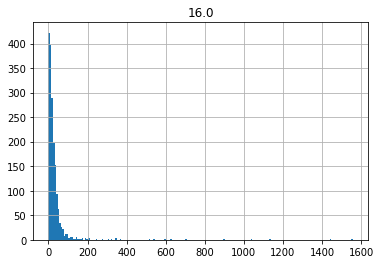

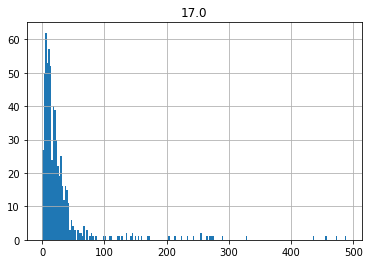

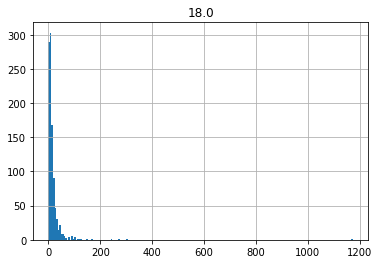

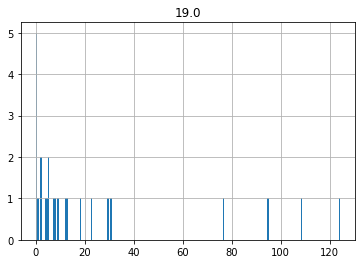

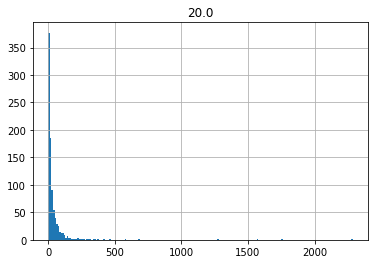

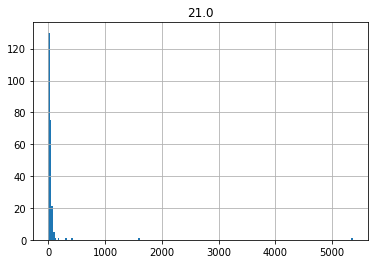

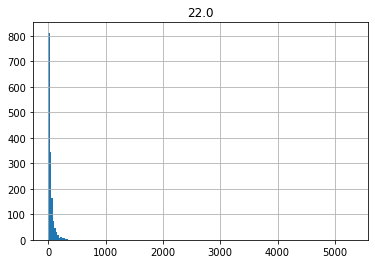

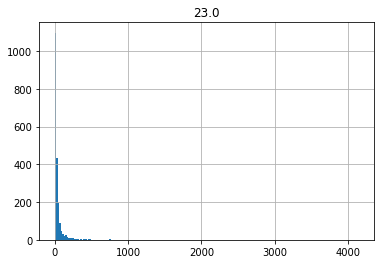

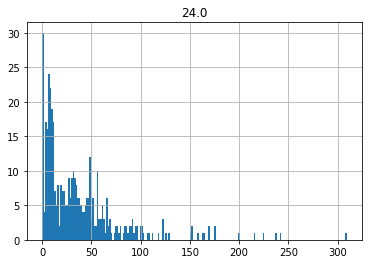

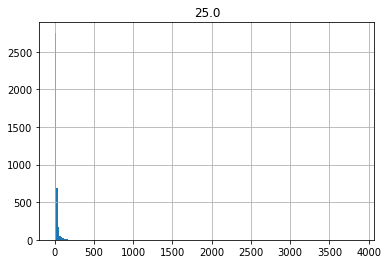

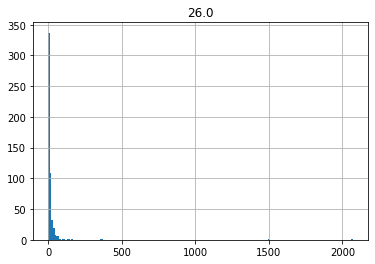

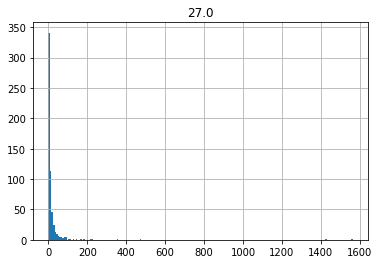

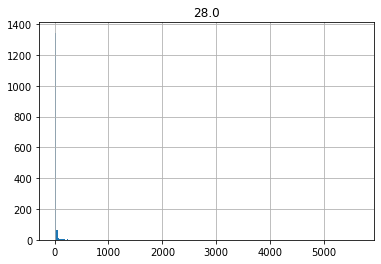

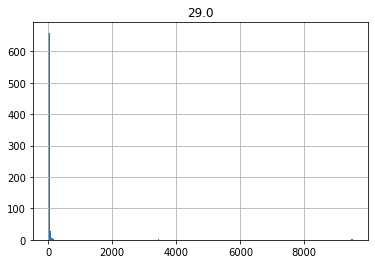

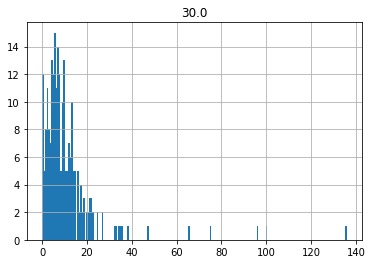

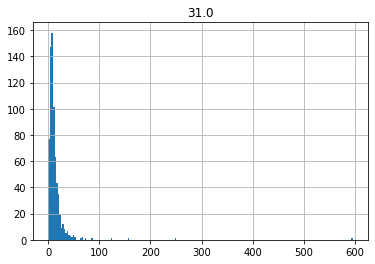

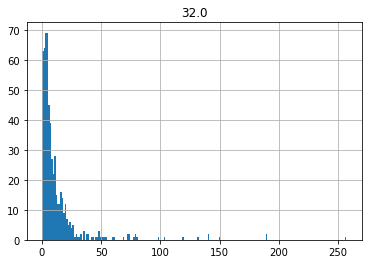

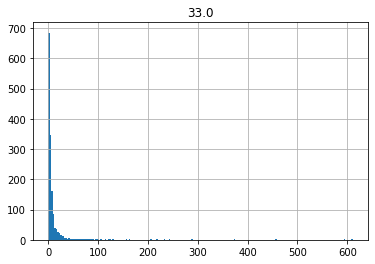

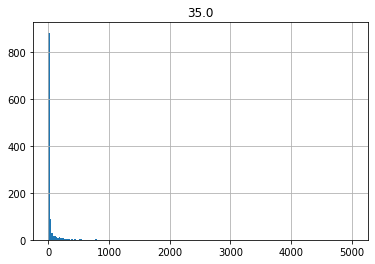

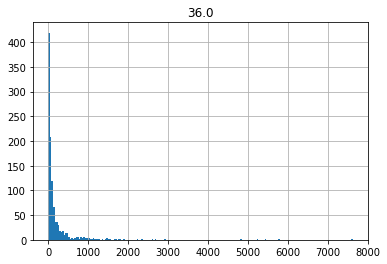

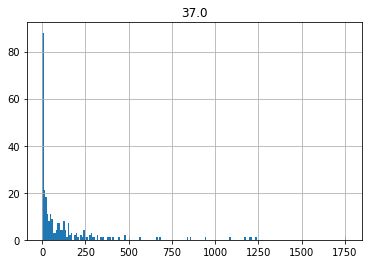

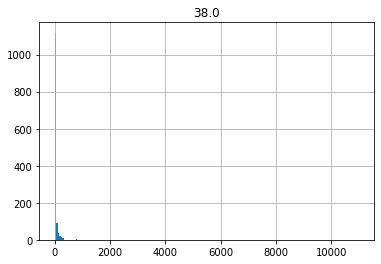

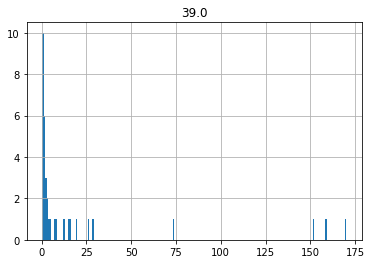

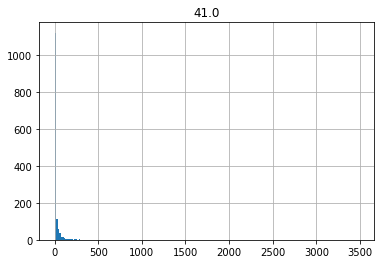

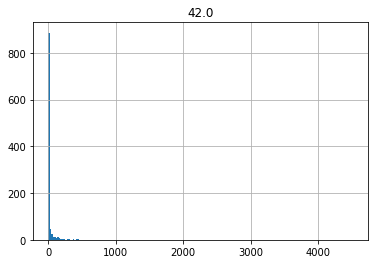

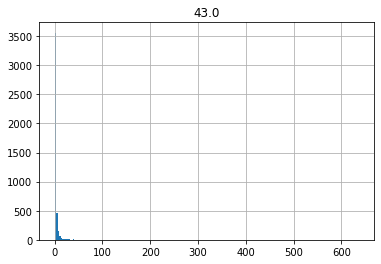

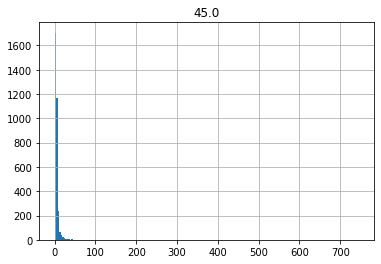

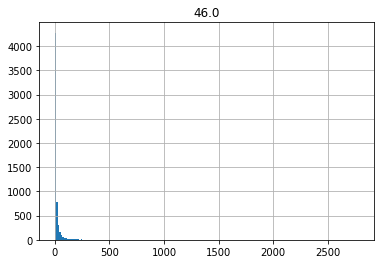

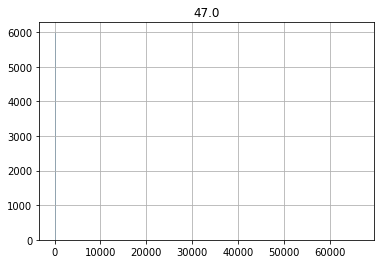

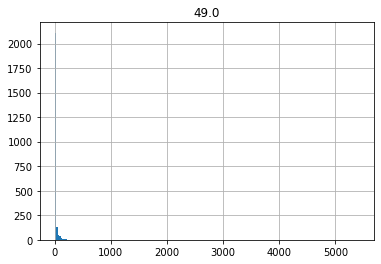

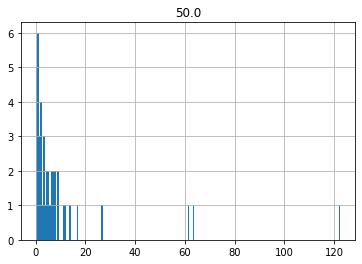

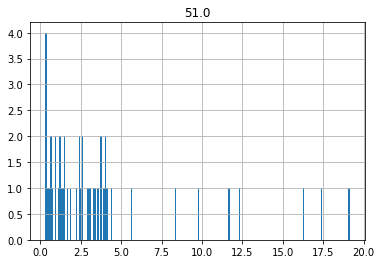

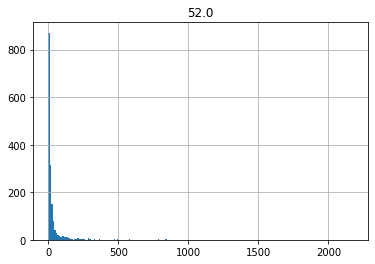

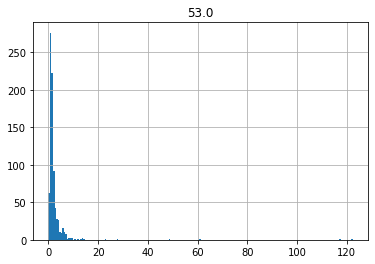

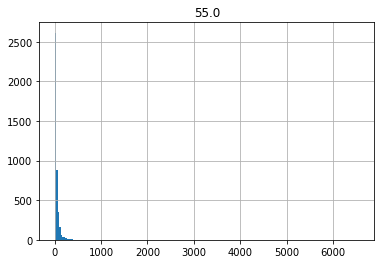

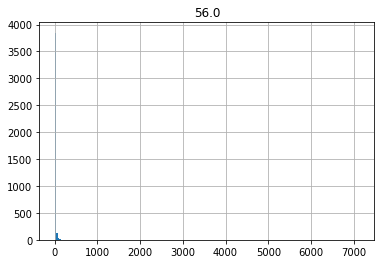

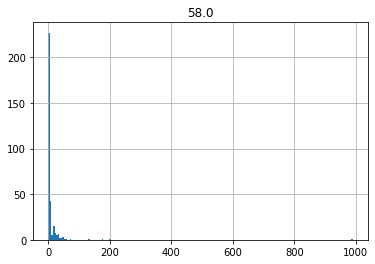

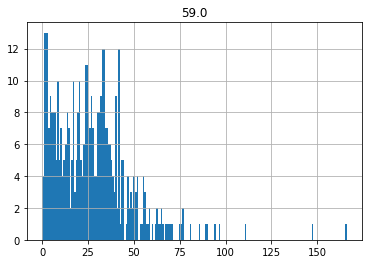

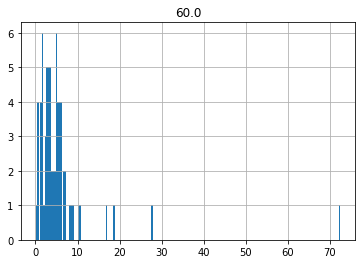

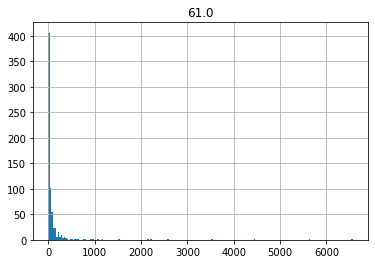

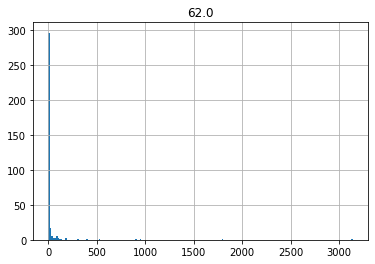

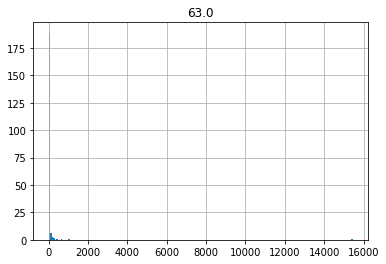

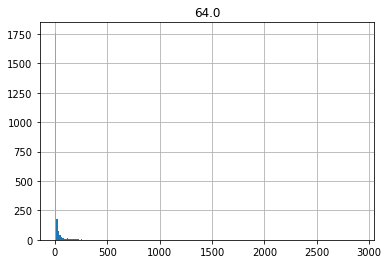

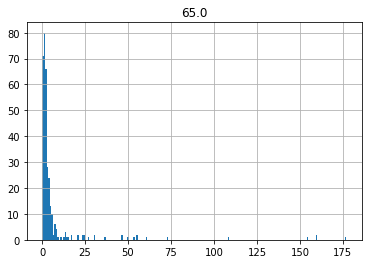

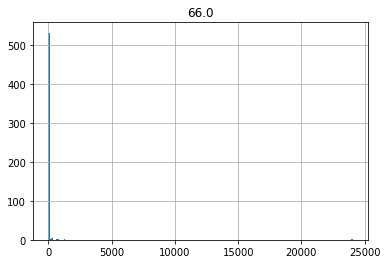

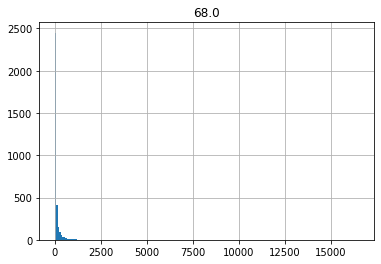

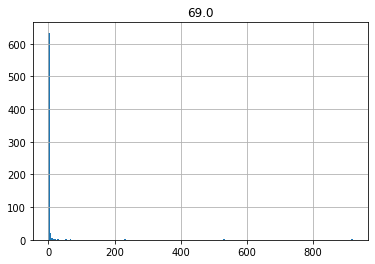

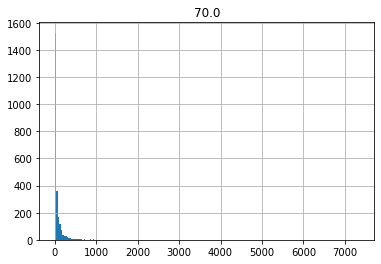

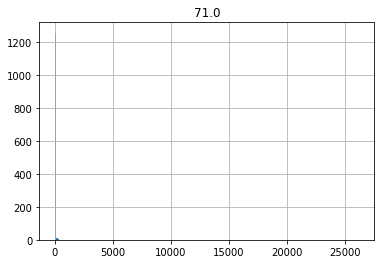

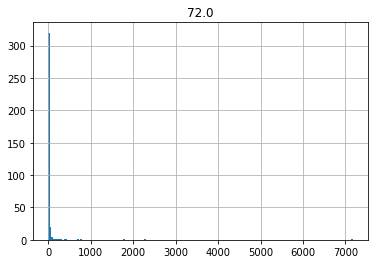

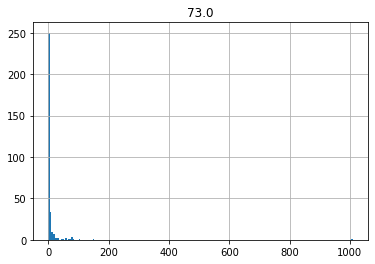

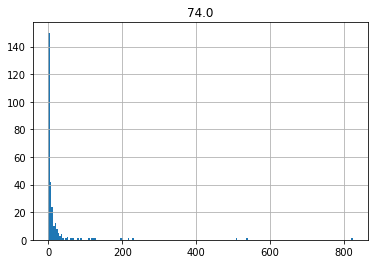

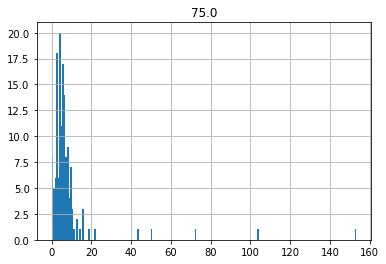

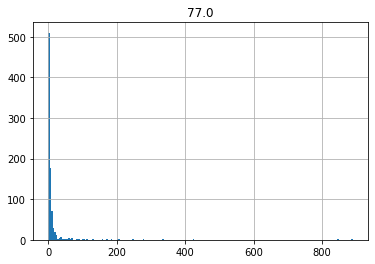

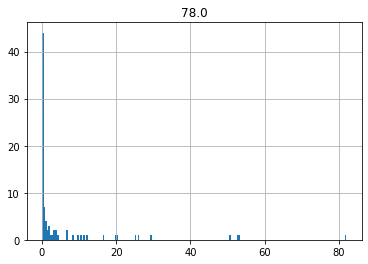

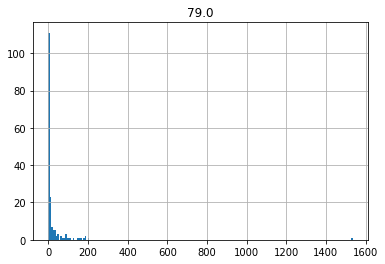

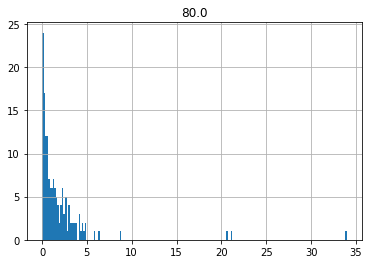

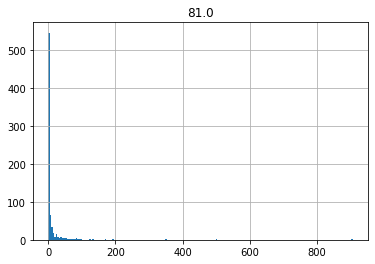

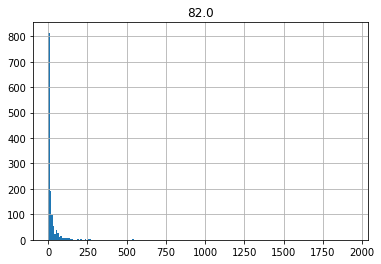

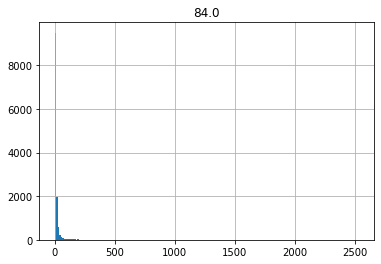

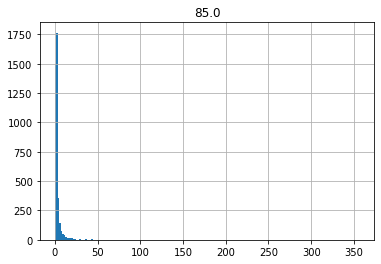

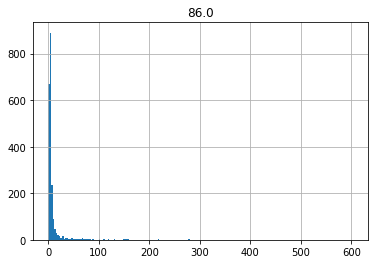

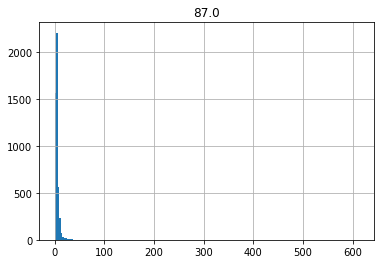

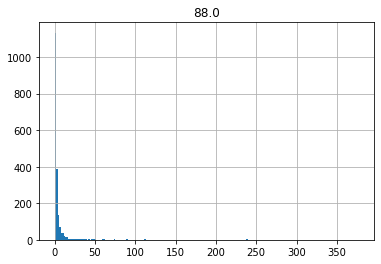

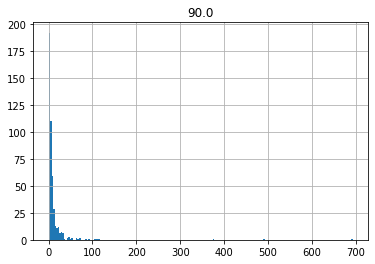

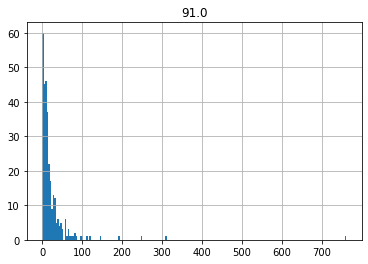

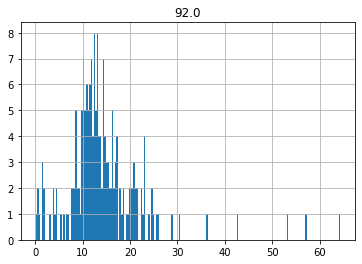

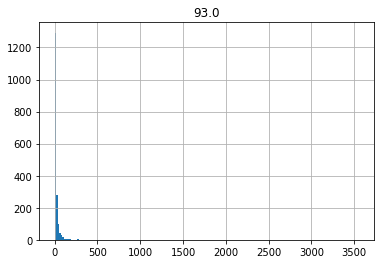

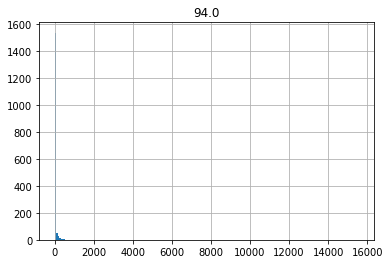

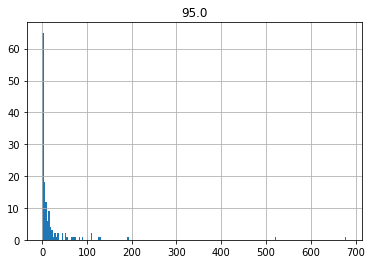

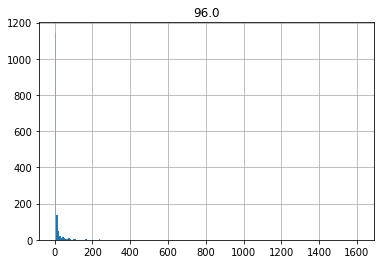

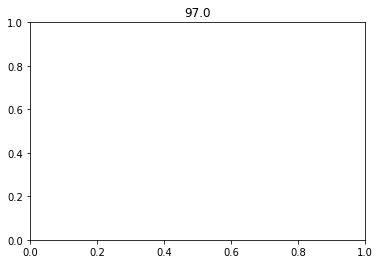

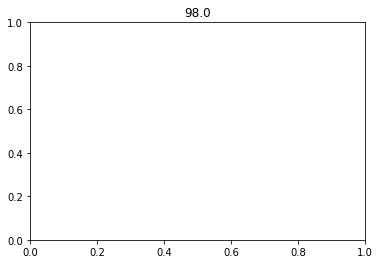

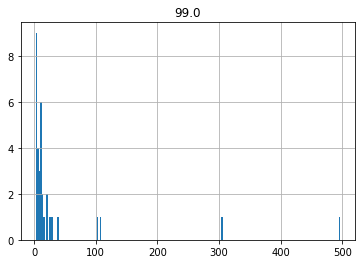

In [47]:
n=len(NAF)
for i in range(n):
    j=NAF[i]
    plt.figure(f'{j}')
    plt.title(f'{j}')
    try:
        plt.plot(df_conso_bis.loc[(j,)]['X'].hist(bins=200))
    except:
        None
    plt.savefig(f'figure/NAF2/{j}.png')

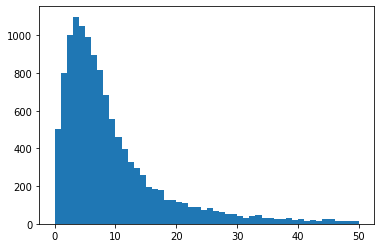

In [48]:
bins_84=np.arange(0,50+1,1)
a=plt.hist(df_conso_bis.loc[(84.0,)]['X'],bins=bins_84)

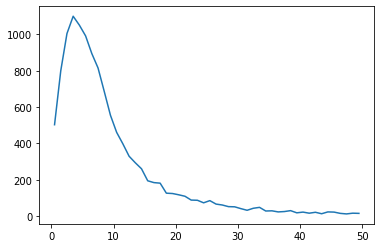

In [49]:
plt.plot(np.arange(0.5,50.5,1),a[0])

/home/guera/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/home/guera/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/home/guera/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the r

/home/guera/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/home/guera/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/home/guera/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the r

/home/guera/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/home/guera/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/home/guera/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the r

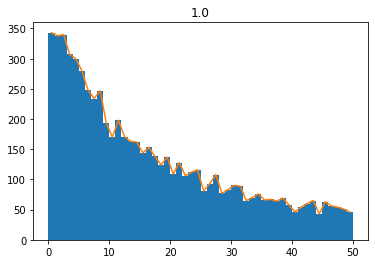

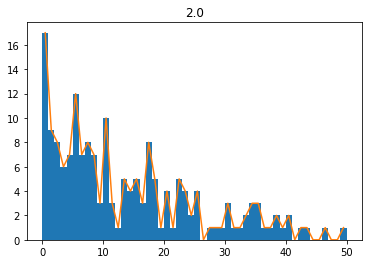

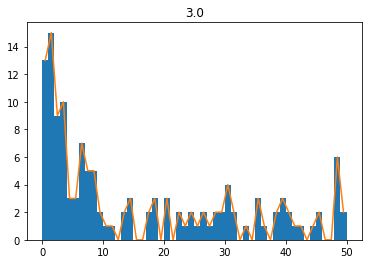

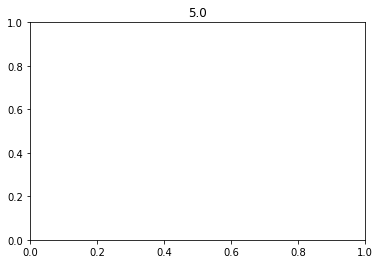

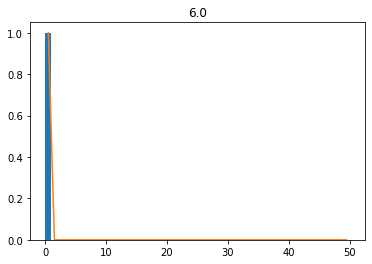

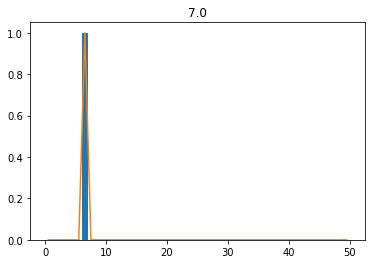

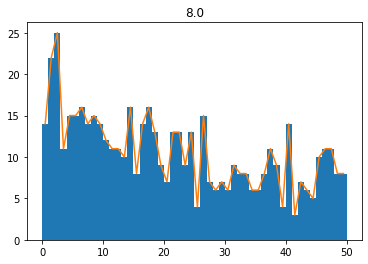

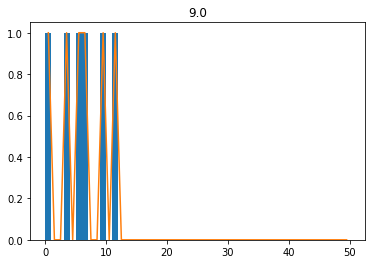

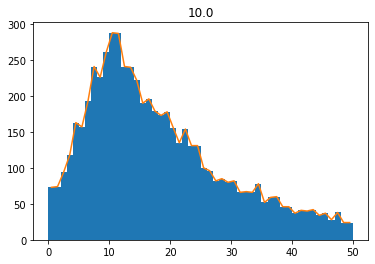

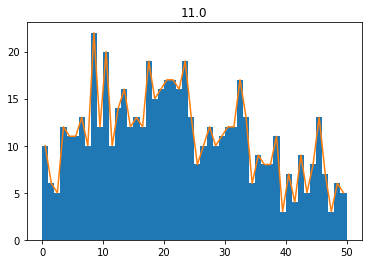

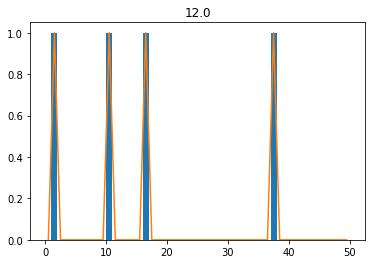

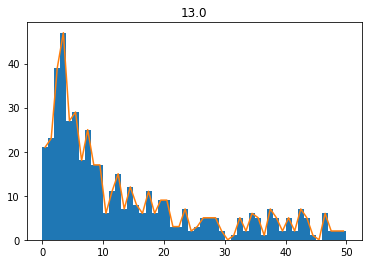

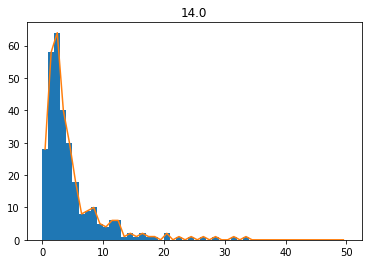

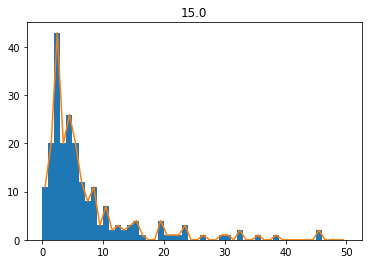

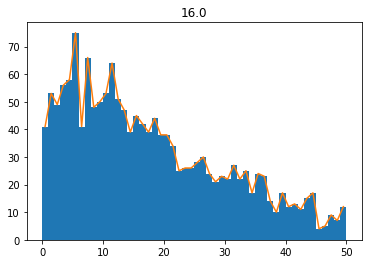

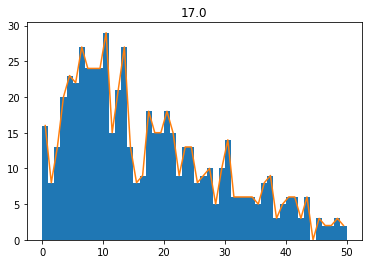

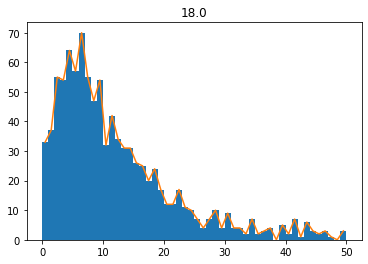

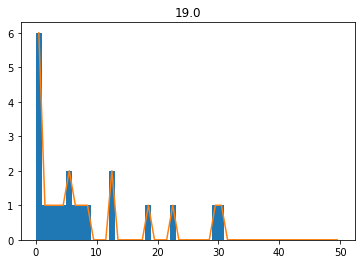

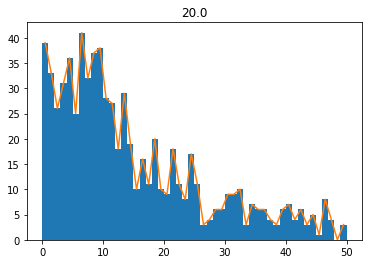

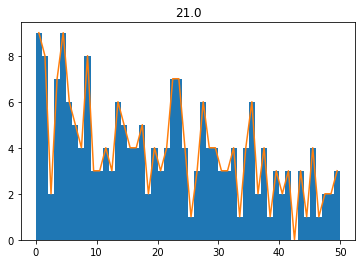

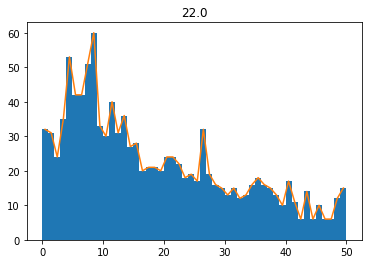

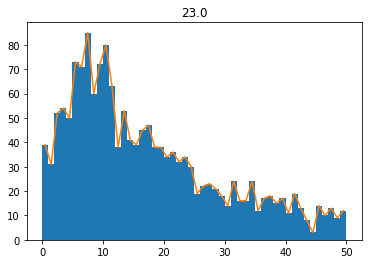

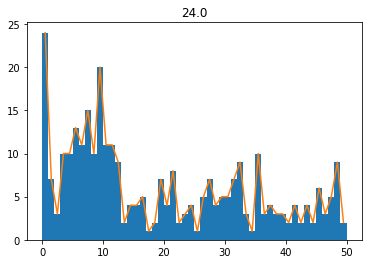

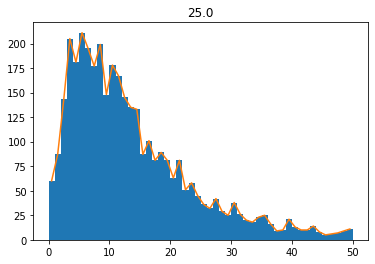

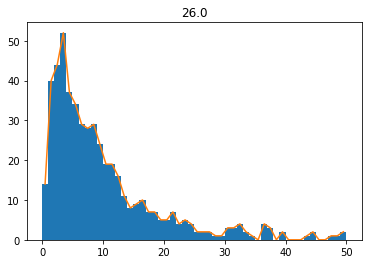

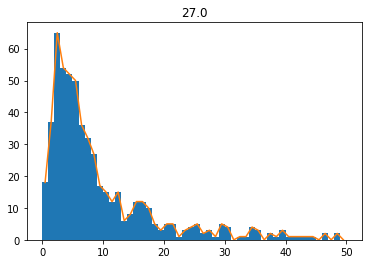

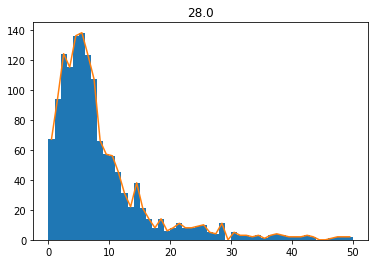

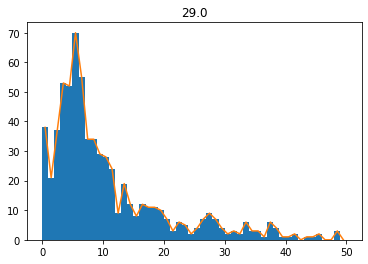

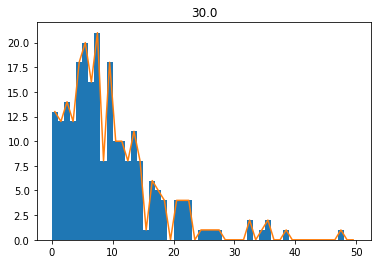

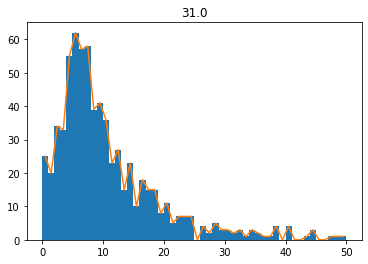

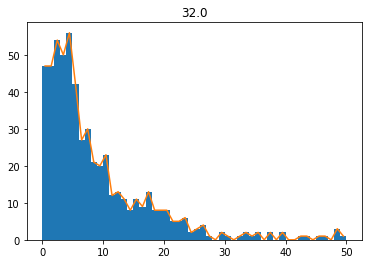

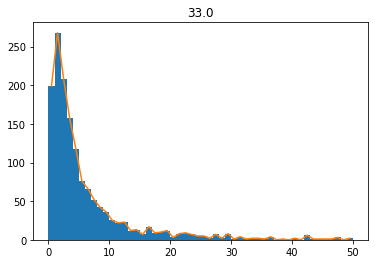

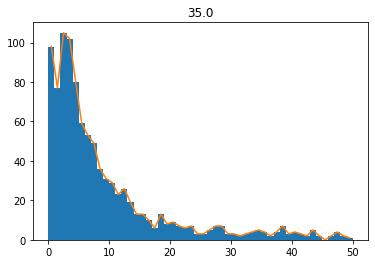

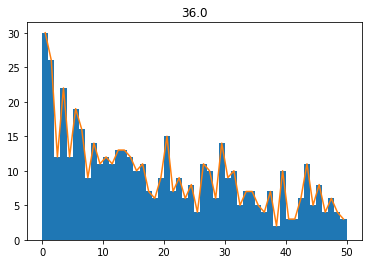

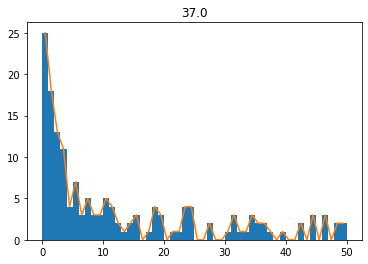

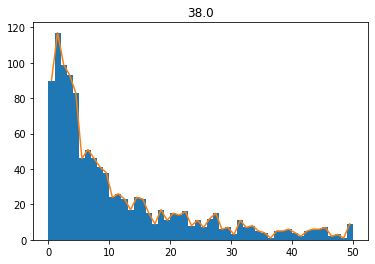

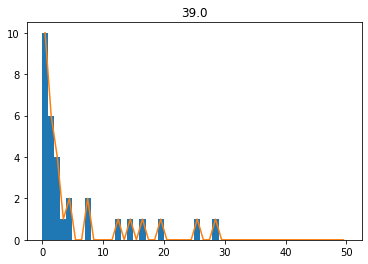

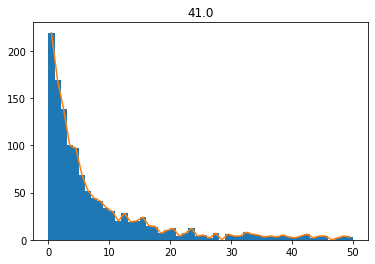

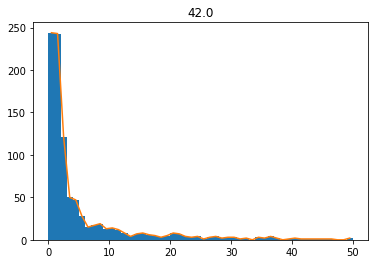

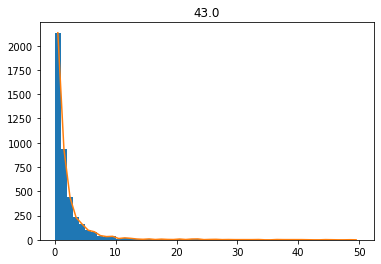

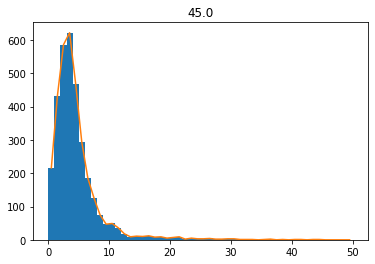

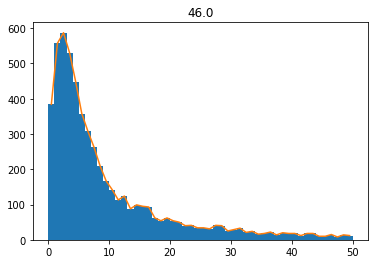

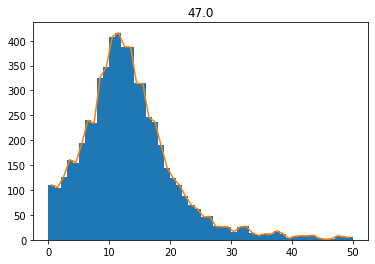

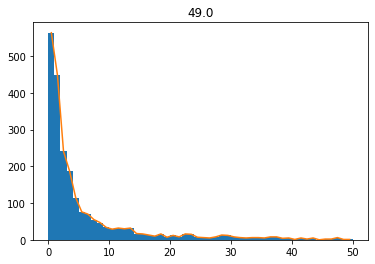

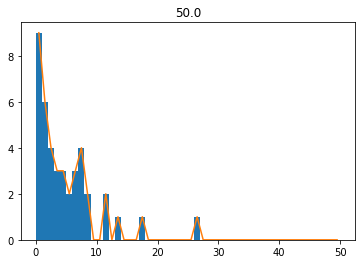

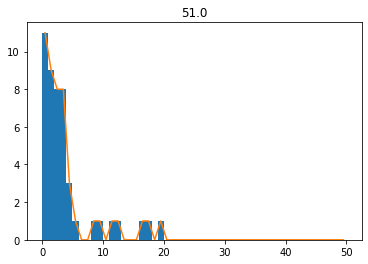

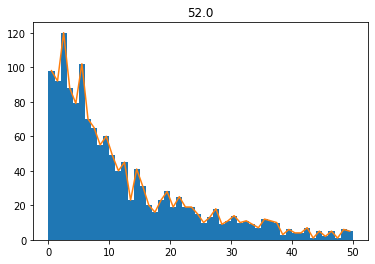

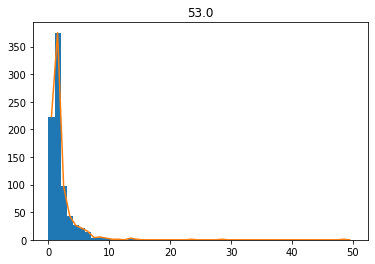

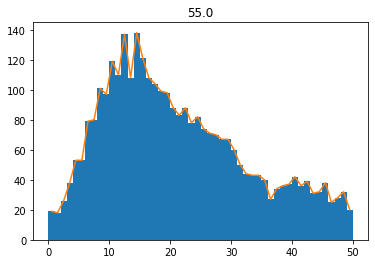

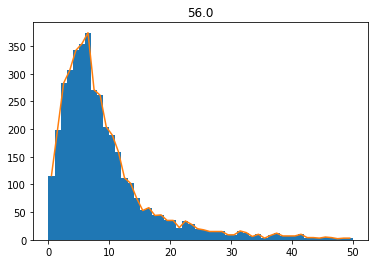

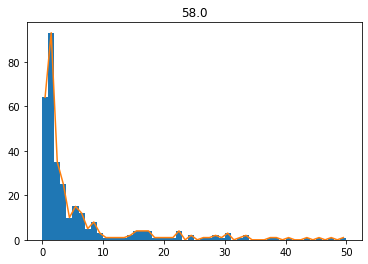

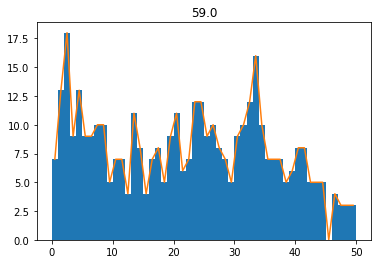

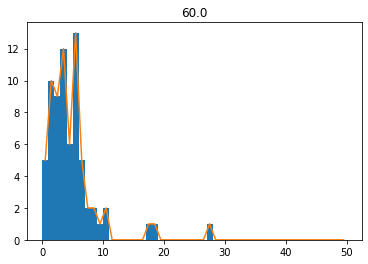

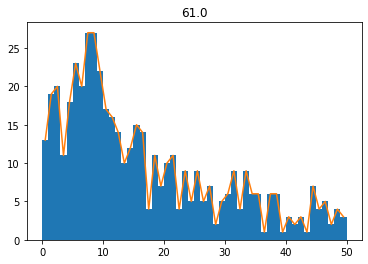

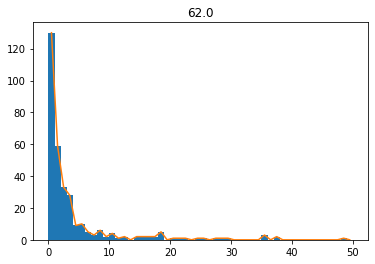

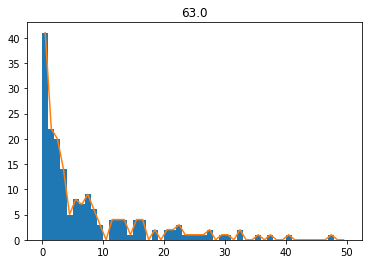

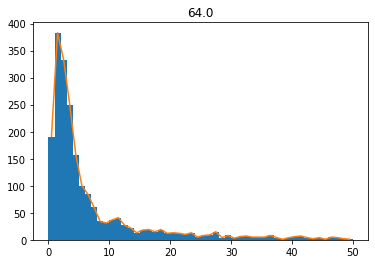

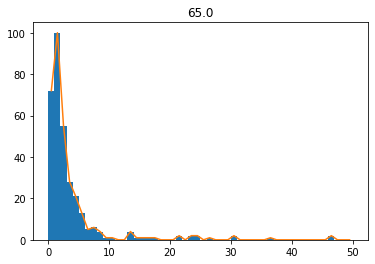

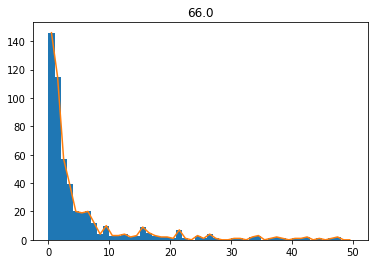

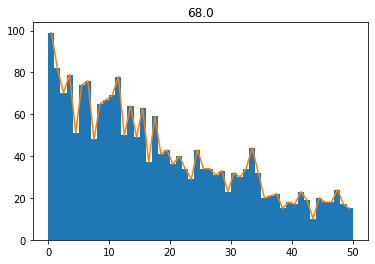

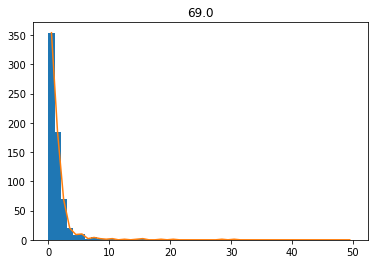

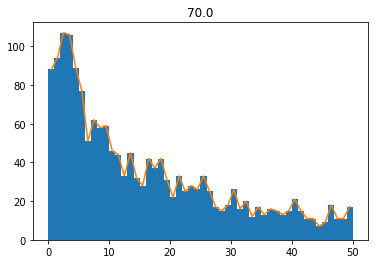

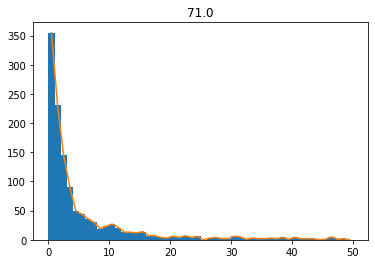

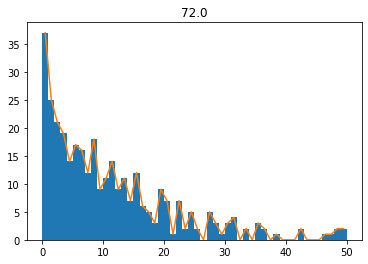

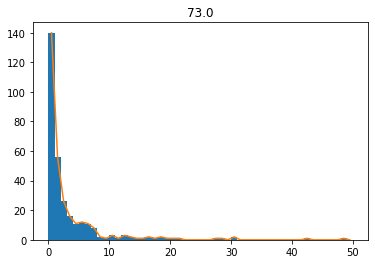

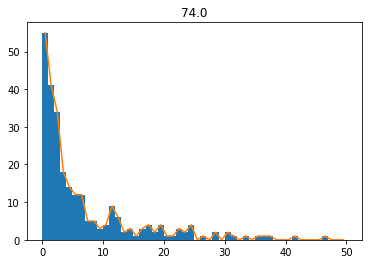

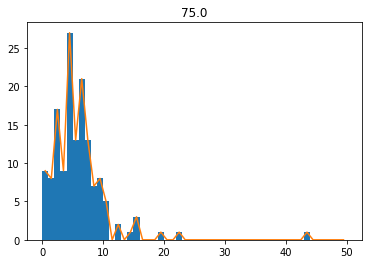

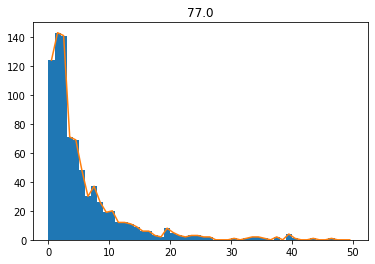

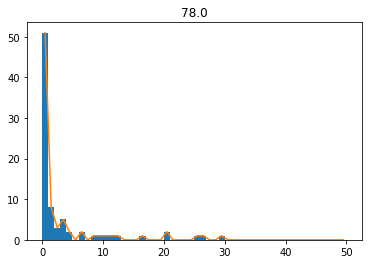

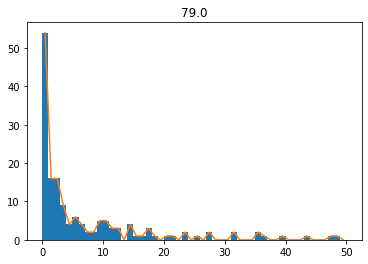

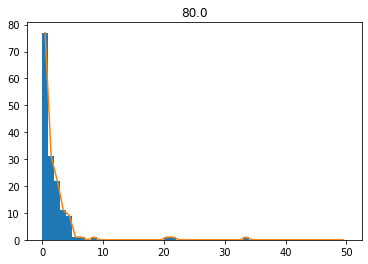

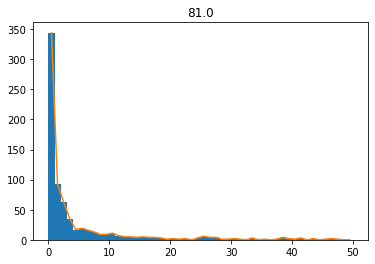

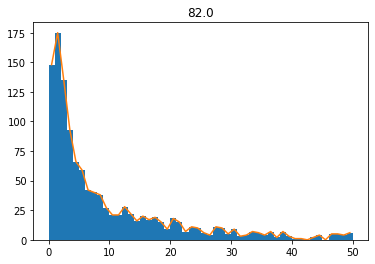

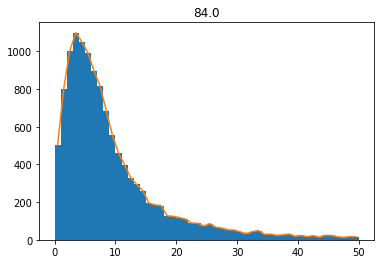

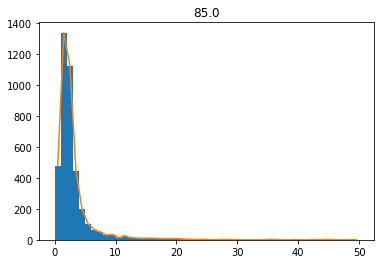

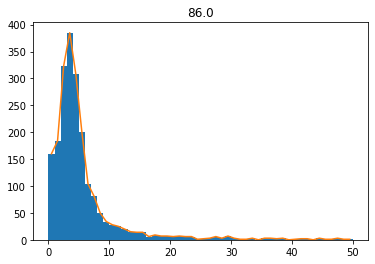

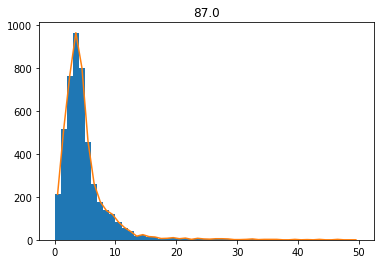

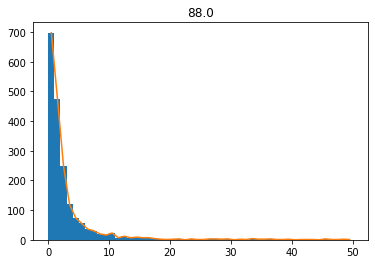

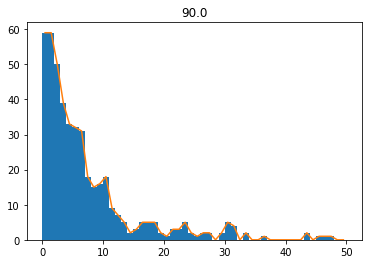

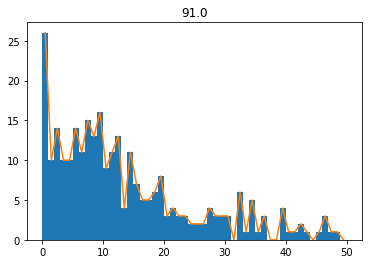

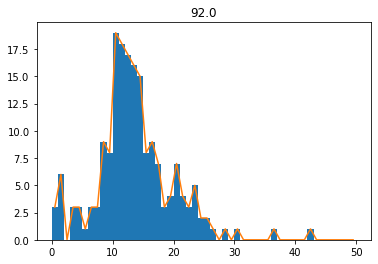

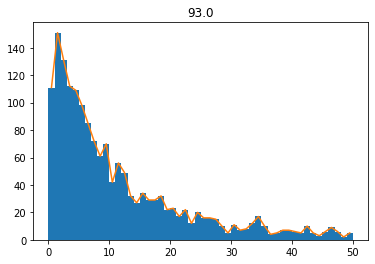

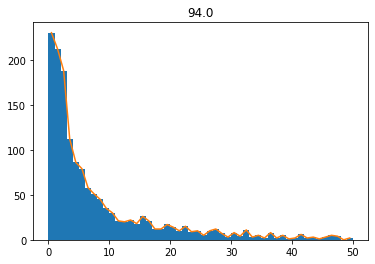

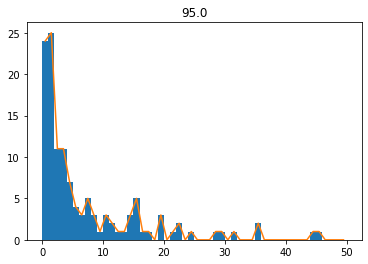

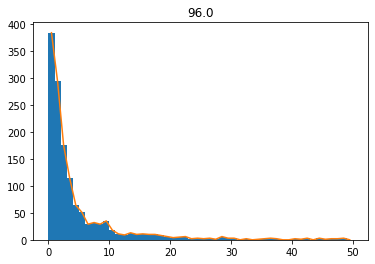

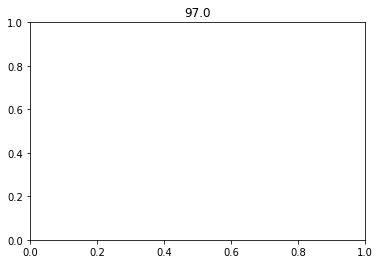

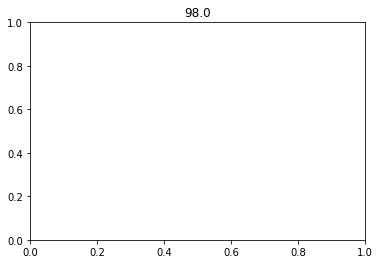

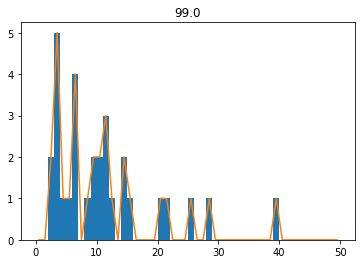

In [50]:
n=len(NAF)
Tab=[np.array([]) for i in range(100)]
for i in range(n):
    j=NAF[i]
    plt.figure(f'{j}')
    plt.title(f'{j}')
    try:
        a=plt.hist(df_conso_bis.loc[(j,)]['X'],bins=bins_84)
        plt.plot(np.arange(0.5,50.5,1),a[0])
        Tab[int(j)]=a[0]
    except:
        None
    plt.savefig(f'figure/NAF2/{j}.png')

In [51]:
df.loc[('013760000','25.73B',)]

/home/guera/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


siret       IRIS  \
trancheEffectifsEtablissement siret                                     
11                            1585094400024  1585094400024  013760000   

                                                siren  \
trancheEffectifsEtablissement siret                     
11                            1585094400024  15850944   

                                            trancheEffectifsEtablissement  \
trancheEffectifsEtablissement siret                                         
11                            1585094400024                            11   

                                            activitePrincipaleEtablissement  
trancheEffectifsEtablissement siret                                          
11                            1585094400024                          25.73B

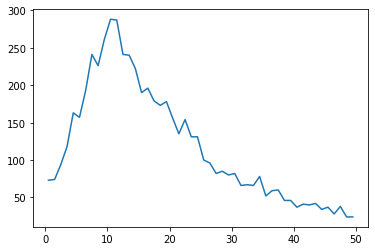

In [52]:
bins=np.arange(0.5,50.5,1)
plt.plot(bins,Tab[10])

In [53]:
eff={'01':1.5, '02':4.0, '03':7.5, '11':14.5, '12':34.5, '21':74.5, '22':149.5, '31':224.5, '32':374.5, '41':749.5, '42':1499.5, '51':3499.5, '52':7499.5, '53':15000, '1.0':1.5, '2.0':4.0, '3.0':7.5, '11.0':14.5, '12.0':34.5, '21.0':74.5, '22.0':149.5, '31.0':224.5, '32.0':374.5, '41.0':749.5, '42.0':1499.5, '51.0':3499.5, '52.0':7499.5, '53.0':15000}

In [54]:
def effec(x):
    return eff[x]

In [55]:
df['effectifs']=np.vectorize(effec)(df['trancheEffectifsEtablissement'])

In [56]:
data_84=df_conso_bis.loc[df_conso_bis['X']<50].loc[(10.0,),'X'].values
data_84

array([12.299358751024387, 6.639403162836822, 12.323789215518051, ...,
       21.802729565320533, 38.06571377666217, 6.281908453503734],
      dtype=object)

In [57]:
len(data_84)

5911

In [58]:
data_84=data_84.astype(int)
data_84

array([12,  6, 12, ..., 21, 38,  6])

In [59]:
type(data_84[0])

numpy.int64

In [60]:
df_conso_bis.loc[(84.0,),'X'].max()

2535.2853983131986

In [61]:
import scipy
import scipy.stats

In [62]:
dist_name = "laplace"

# Paramètres de la loi
dist = getattr(scipy.stats, dist_name)

# Modéliser la loi
param = dist.fit(data_84)

In [63]:
param

(14.99999999555017, 8.931449106069742)

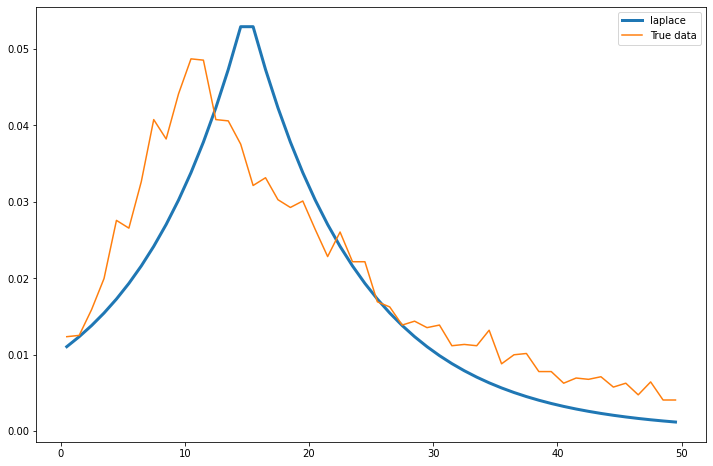

In [64]:
loc = param[-2]
scale = param[-1]
arg = param[:-2]

pdf = dist.pdf(bins, loc=loc, scale=scale, *arg)

plt.figure(figsize=(12,8))
plt.plot(bins, pdf, label=dist_name, linewidth=3) 
plt.plot(bins, Tab[10]/5911, label='True data')
plt.legend()
plt.show()

In [80]:
dist_names = ['norm', 'beta','gamma', 'pareto', 't', 'lognorm', 'invgamma', 'invgauss',  'loggamma', 'alpha', 'chi', 'chi2']
data=data_84
x=bins
y=Tab[10]/5911

In [81]:
sse = np.inf
sse_thr = 0.0010

# Pour chaque distribution
for name in dist_names:

    # Modéliser
    dist = getattr(scipy.stats, name)
    param = dist.fit(data)

    # Paramètres
    loc = param[-2]
    scale = param[-1]
    arg = param[:-2]

    # PDF
    pdf = dist.pdf(x, *arg, loc=loc, scale=scale)
    # SSE
    model_sse = np.sum((y - pdf)**2)

    # Si le SSE est ddiminué, enregistrer la loi
    if model_sse < sse :
        best_pdf = pdf
        sse = model_sse
        best_loc = loc
        best_scale = scale
        best_arg = arg
        best_name = name

    # Si en dessous du seuil, quitter la boucle
    if model_sse < sse_thr :
        break

/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


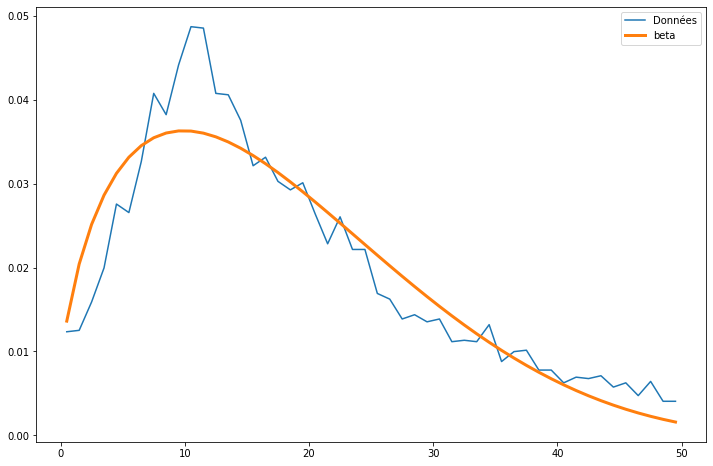

Selected Model :  beta
Loc. param. :  -0.4216177045976976
Scale param. :  66.67384111691531
Other arguments :  (1.6224497453012277, 4.389751893637431)
SSE :  0.0009592680305388948


In [82]:
plt.figure(figsize=(12,8))
plt.plot(x, y, label="Données")
plt.plot(x, best_pdf, label=best_name, linewidth=3)
plt.legend(loc='upper right')
plt.show()

# Détails sur la loi sélectionnée
print("Selected Model : ", best_name)
print("Loc. param. : ", best_loc)
print("Scale param. : ", best_scale)
print("Other arguments : ", best_arg)
print("SSE : ", sse)

(array([ 74.,  94., 118., 163., 157., 193., 241., 226., 261., 288., 287.,
        241., 240., 222., 190., 196., 179., 173., 178., 156., 135., 154.,
        131., 131., 100.,  96.,  82.,  85.,  80.,  82.,  66.,  67.,  66.,
         78.,  52.,  59.,  60.,  46.,  46.,  37.,  41.,  40.,  42.,  34.,
         37.,  28.,  38.,  24.,  24.]),
 array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 43.5,
        44.5, 45.5, 46.5, 47.5, 48.5, 49.5]),
 <a list of 49 Patch objects>)

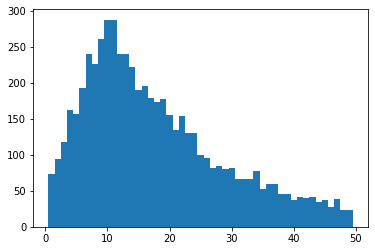

In [68]:
plt.hist(data,bins=bins)

0


/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


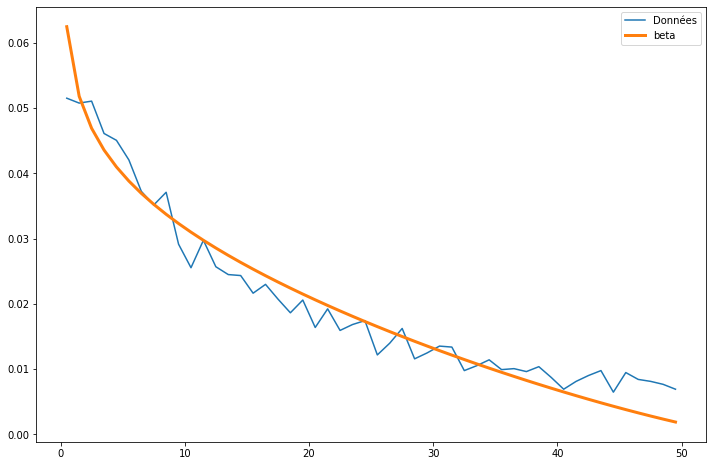

Selected Model :  beta
Loc. param. :  -4.2086560689200664e-32
Scale param. :  54.65106017231453
Other arguments :  (0.8498374562968958, 2.196207588412771)
SSE :  0.000550327237026857
1


/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


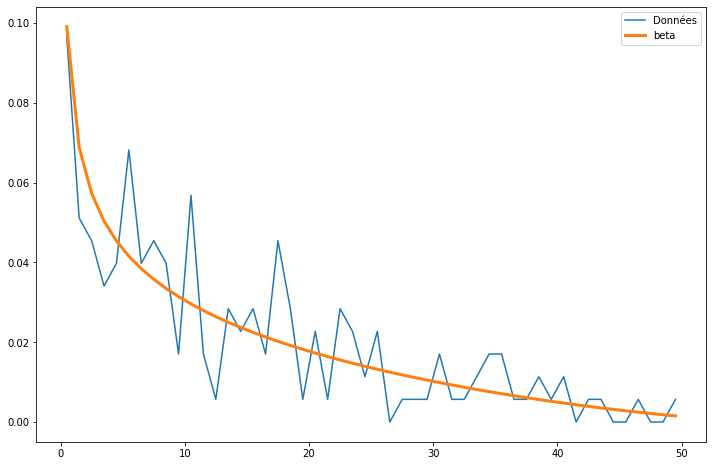

Selected Model :  beta
Loc. param. :  -1.2737704778597107e-31
Scale param. :  57.14062319341615
Other arguments :  (0.6905882128070504, 2.3692051298294765)
SSE :  0.005187241436247473
2


/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


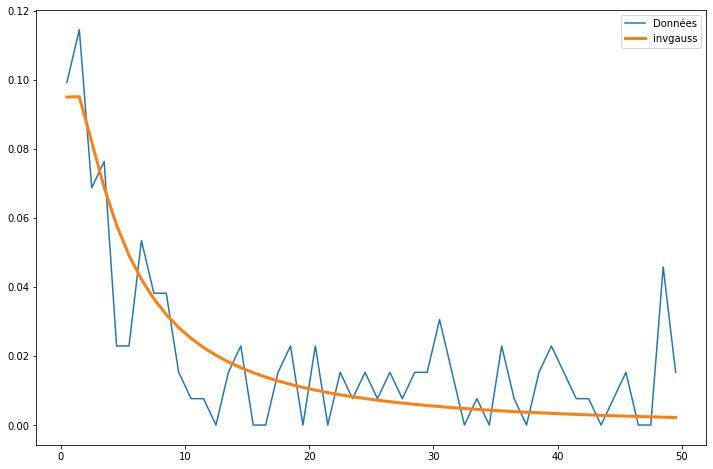

Selected Model :  invgauss
Loc. param. :  -1.3159656428071145
Scale param. :  6.86432101965447
Other arguments :  (2.4458833218581644,)
SSE :  0.009283724657144067
3
4


/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1740: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:406: RuntimeWarning: invalid value encountered in double_scalars
  return m3 / np.power(m2, 1.5)
/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:417: RuntimeWarning: invalid value encountered in double_scalars
  return m4 / m2**2 - 3
/home/guera/.local/lib/python3.6/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/home/guera/.local/lib/python3.6/site-p

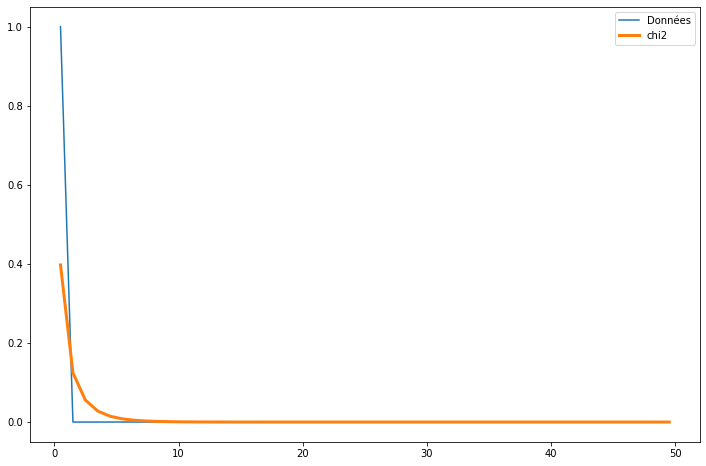

Selected Model :  chi2
Loc. param. :  -3.3236152831688453e-34
Scale param. :  1.0160492250559816
Other arguments :  (0.779425722663547,)
SSE :  0.3827149752158297
5


/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1740: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:406: RuntimeWarning: invalid value encountered in double_scalars
  return m3 / np.power(m2, 1.5)
/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:417: RuntimeWarning: invalid value encountered in double_scalars
  return m4 / m2**2 - 3
/home/guera/.local/lib/python3.6/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/home/guera/.local/lib/python3.6/site-p

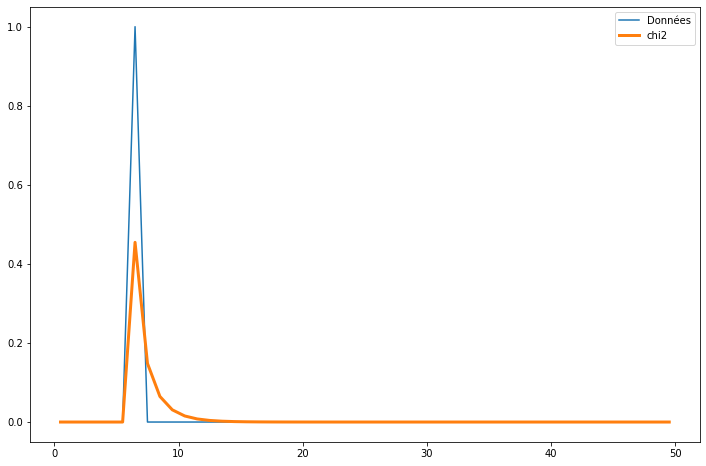

Selected Model :  chi2
Loc. param. :  5.999999999999998
Scale param. :  0.870889600353679
Other arguments :  (1.005158242299189,)
SSE :  0.3249616822761493
6


/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


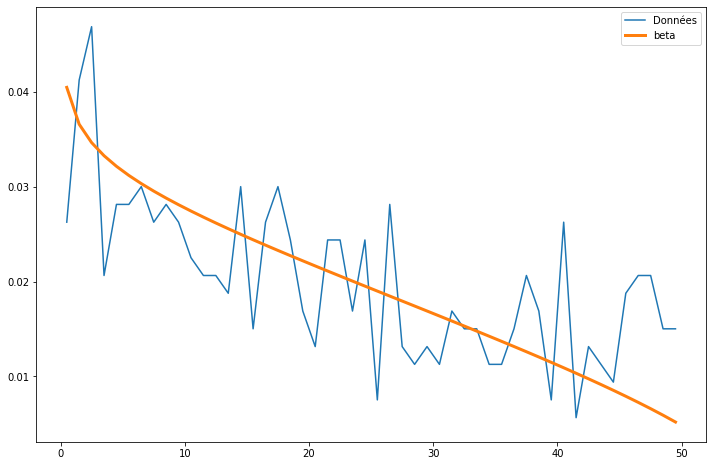

Selected Model :  beta
Loc. param. :  -6.962076871239614e-27
Scale param. :  54.556138381452556
Other arguments :  (0.9201545934947921, 1.7140125361083949)
SSE :  0.002441586443627684
7


/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


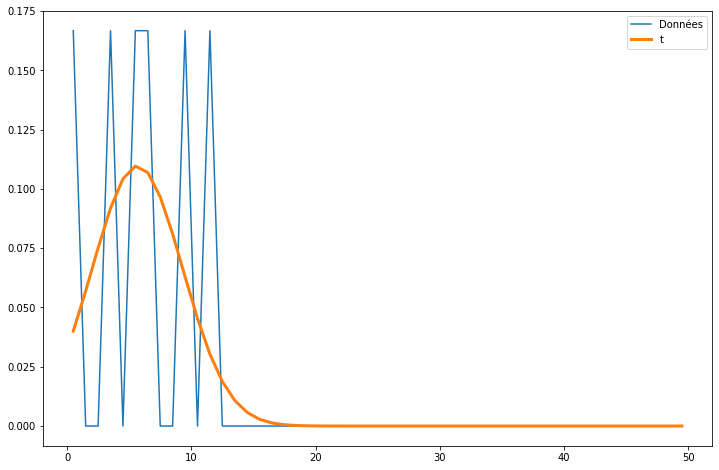

Selected Model :  t
Loc. param. :  5.666720925161064
Scale param. :  3.6365240329088087
Other arguments :  (9017792.175179668,)
SSE :  0.096027988680108
8


/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


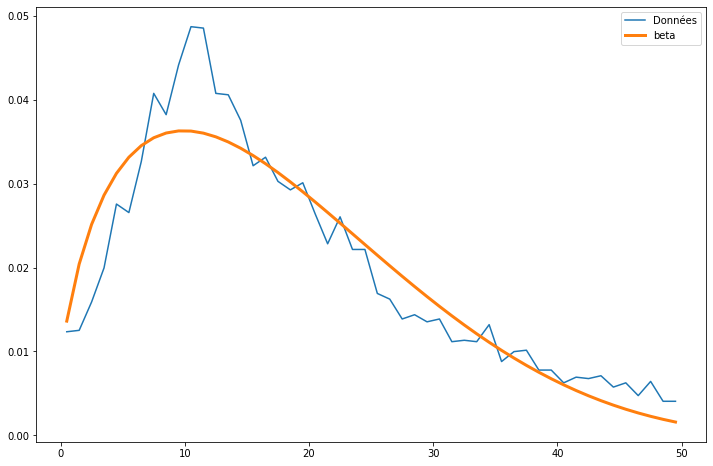

Selected Model :  beta
Loc. param. :  -0.4216177045976976
Scale param. :  66.67384111691531
Other arguments :  (1.6224497453012277, 4.389751893637431)
SSE :  0.0009592680305388948
9


/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


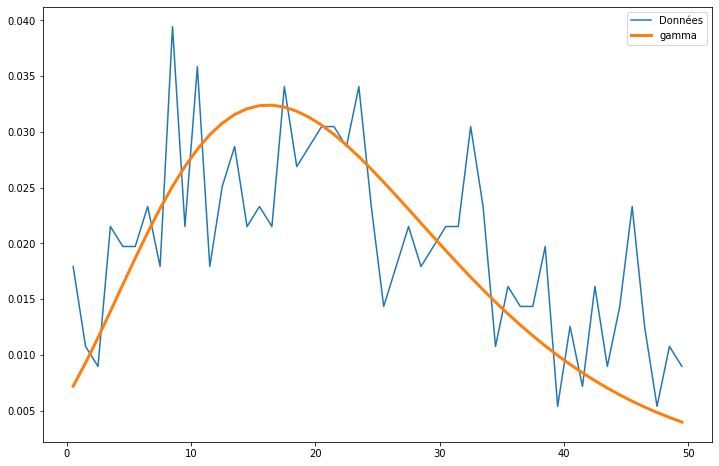

Selected Model :  gamma
Loc. param. :  -9.439037073730988
Scale param. :  5.701201366317706
Other arguments :  (5.495283889908059,)
SSE :  0.0022367916157447596
10


/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


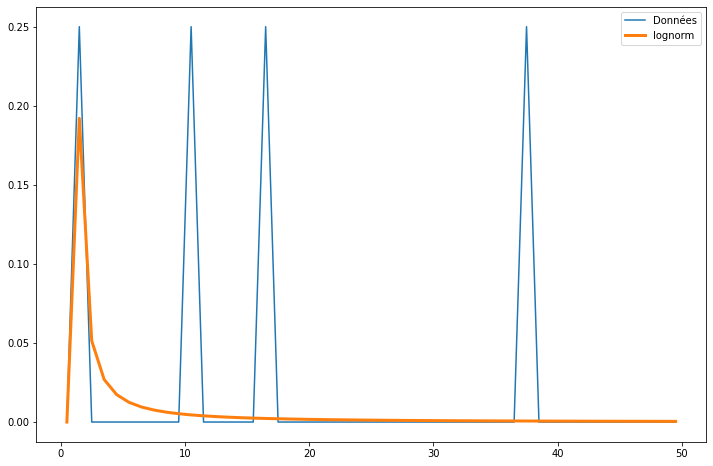

Selected Model :  lognorm
Loc. param. :  0.9999997734834452
Scale param. :  0.06842399257117696
Other arguments :  (3.5521759794599186,)
SSE :  0.19129426571488925
11


/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


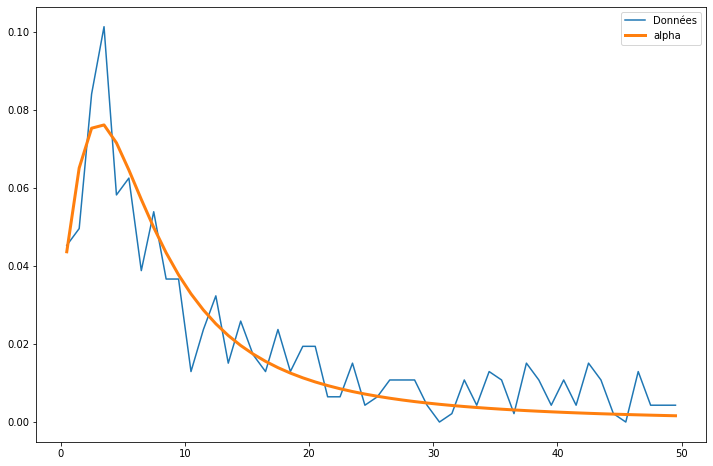

Selected Model :  alpha
Loc. param. :  -5.9924263391241634
Scale param. :  21.27312831060376
Other arguments :  (1.4875772135706855,)
SSE :  0.0033904367048973494
12


/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/guera/.local/lib/python3.6/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1702: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


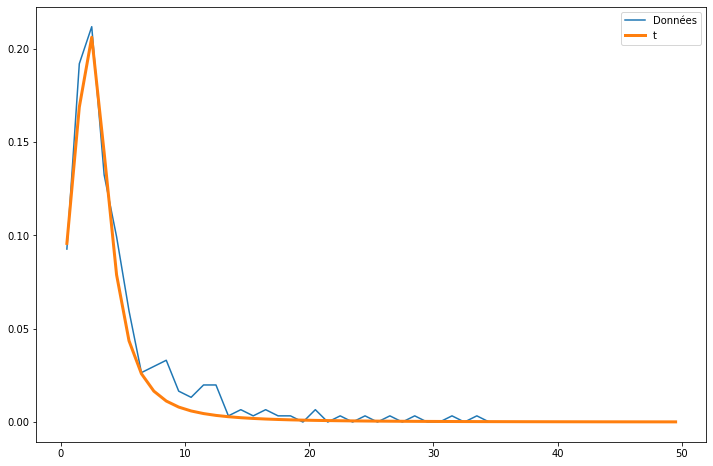

Selected Model :  t
Loc. param. :  2.344671967901947
Scale param. :  1.6309700228008421
Other arguments :  (1.4472747647908297,)
SSE :  0.0028210899683855373
13


/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/guera/.local/lib/python3.6/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


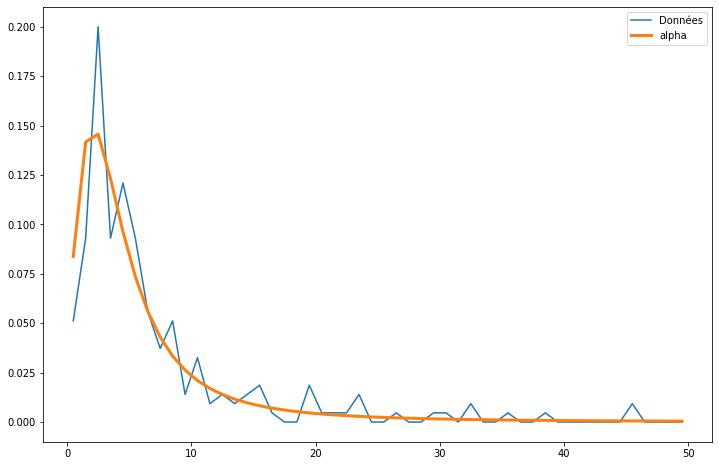

Selected Model :  alpha
Loc. param. :  -4.062511122050729
Scale param. :  17.581766540761024
Other arguments :  (2.1761230355548635,)
SSE :  0.009713378839351557
14


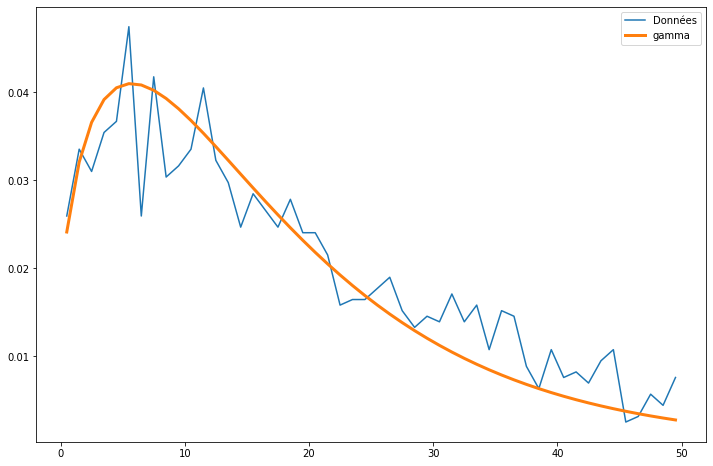

Selected Model :  gamma
Loc. param. :  -0.5214425018385136
Scale param. :  11.429761876579509
Other arguments :  (1.5452612919682114,)
SSE :  0.0009761904760773393
15


/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


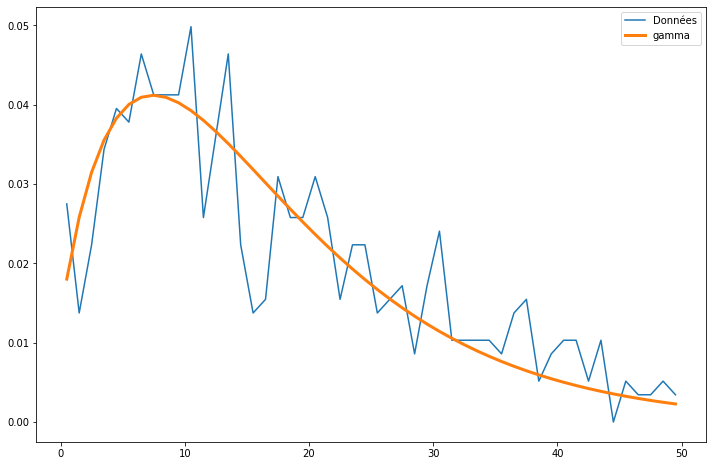

Selected Model :  gamma
Loc. param. :  -0.9807939629256589
Scale param. :  9.316650305773427
Other arguments :  (1.9043341768872866,)
SSE :  0.0020378023920293734
16


/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


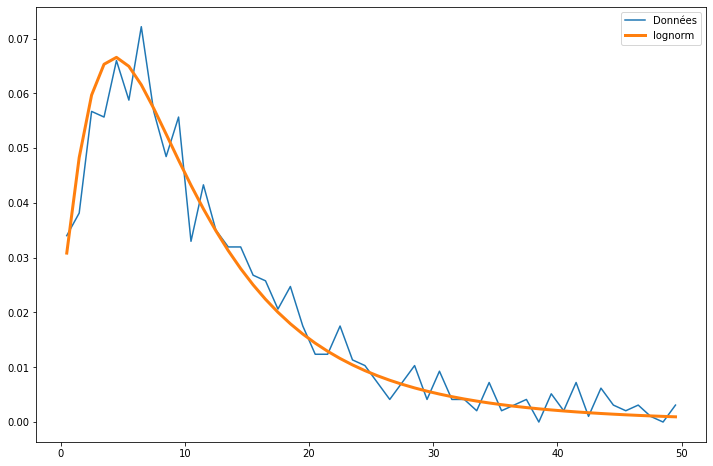

Selected Model :  lognorm
Loc. param. :  -2.2585152694702044
Scale param. :  10.890606436054068
Other arguments :  (0.7055147892116498,)
SSE :  0.0008375400842039287
17


/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


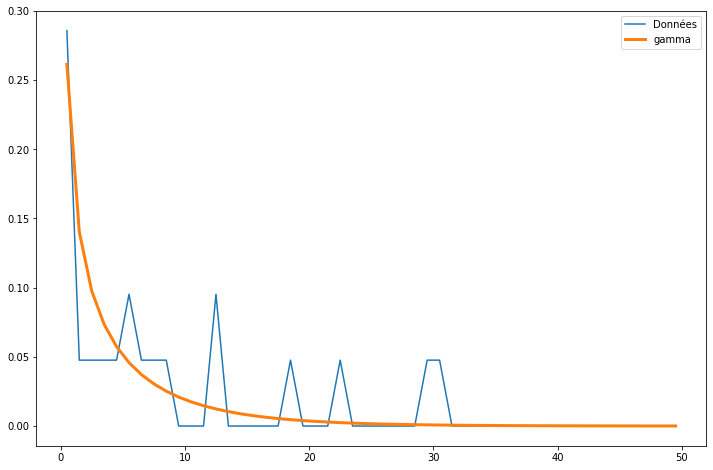

Selected Model :  gamma
Loc. param. :  -7.145623050274396e-28
Scale param. :  7.389706778539266
Other arguments :  (0.556414683016961,)
SSE :  0.03224246229344528
18


/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


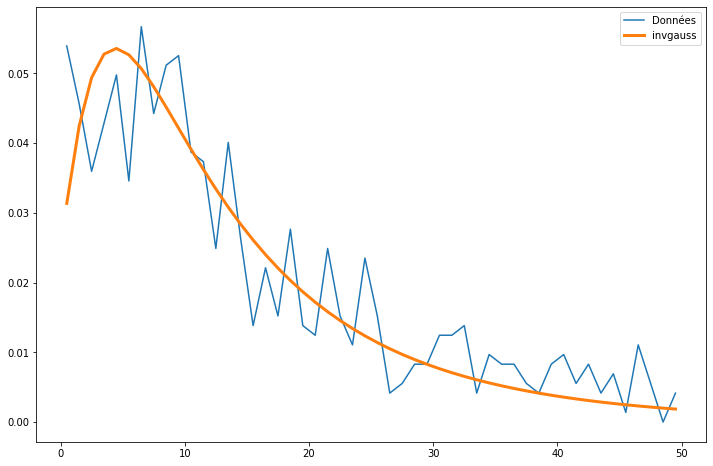

Selected Model :  invgauss
Loc. param. :  -3.9465184655464185
Scale param. :  31.76428969645012
Other arguments :  (0.5705639444981838,)
SSE :  0.002443353230327265
19


/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


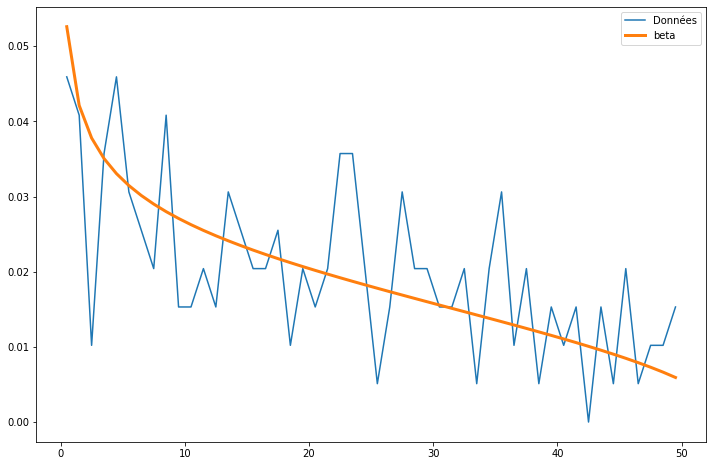

Selected Model :  beta
Loc. param. :  -3.4318166503455625e-31
Scale param. :  53.688855118919534
Other arguments :  (0.8066728822130671, 1.5094586456256043)
SSE :  0.0038005312236982693
20


/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


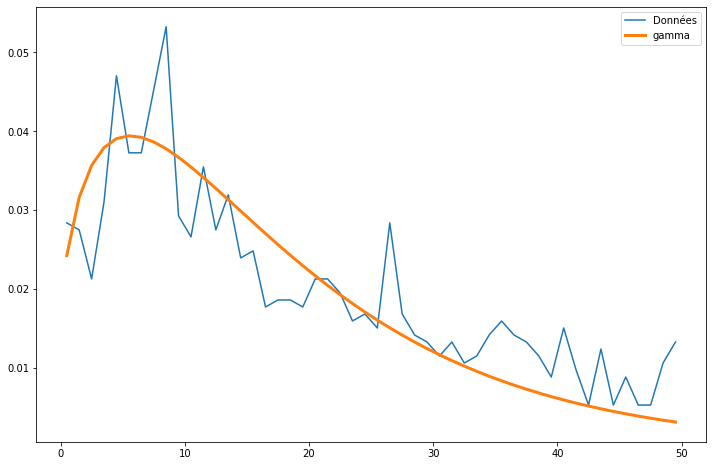

Selected Model :  gamma
Loc. param. :  -0.47959595572486236
Scale param. :  12.34116661149817
Other arguments :  (1.4927203065737662,)
SSE :  0.0017791800734975403
21


/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


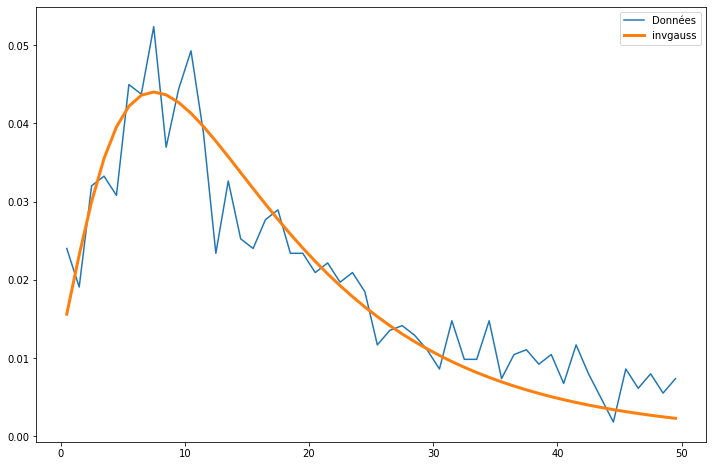

Selected Model :  invgauss
Loc. param. :  -5.692432120874921
Scale param. :  60.5263756537785
Other arguments :  (0.36957369908966864,)
SSE :  0.0011058031125024917
22


/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


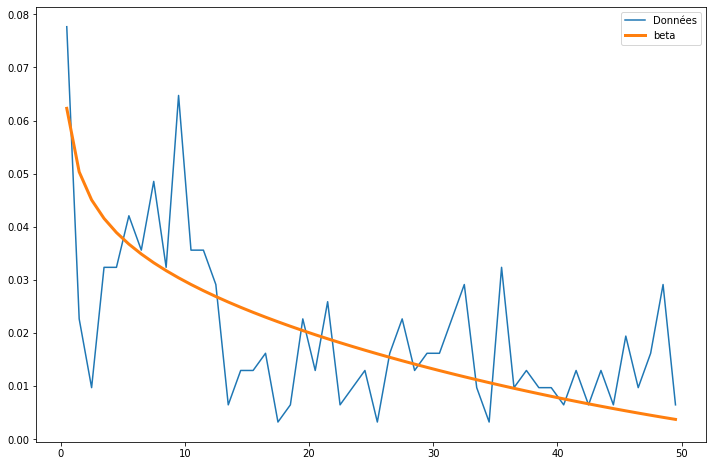

Selected Model :  beta
Loc. param. :  -9.573509029965577e-29
Scale param. :  62.64982121608364
Other arguments :  (0.8249949689316244, 2.2945499308601613)
SSE :  0.007791739491525636
23


/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


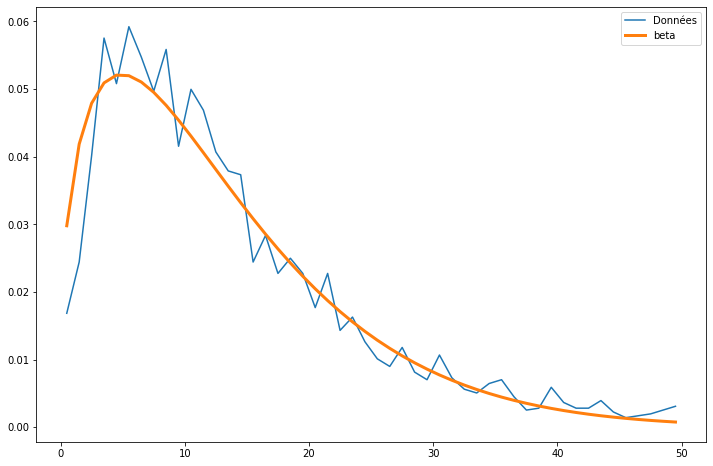

Selected Model :  beta
Loc. param. :  -0.23993987809388143
Scale param. :  139.10638693404616
Other arguments :  (1.5110374593804905, 14.316267648022173)
SSE :  0.0009994034969459022
24


/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


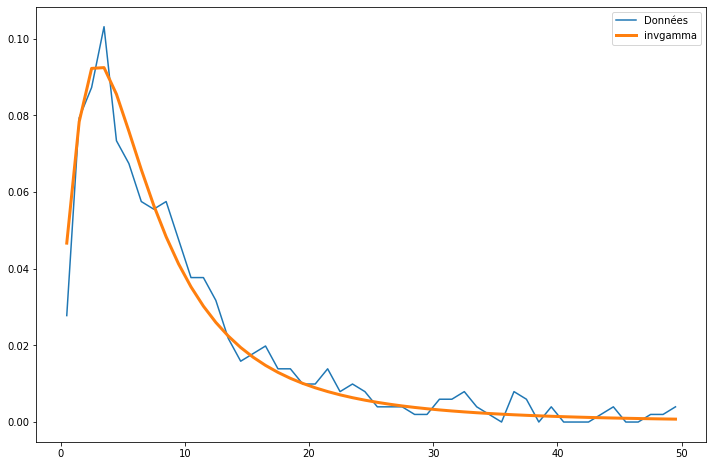

Selected Model :  invgamma
Loc. param. :  -2.8404538262452803
Scale param. :  21.522155905824775
Other arguments :  (2.6902184742715365,)
SSE :  0.0012588091472553401
25


/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


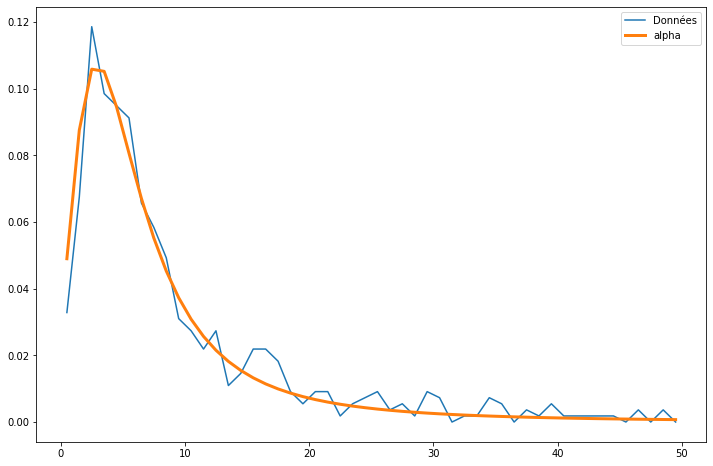

Selected Model :  alpha
Loc. param. :  -5.588060431637563
Scale param. :  24.499794592078246
Other arguments :  (2.1815621692332727,)
SSE :  0.0016539466461935781
26


/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/guera/.local/lib/python3.6/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


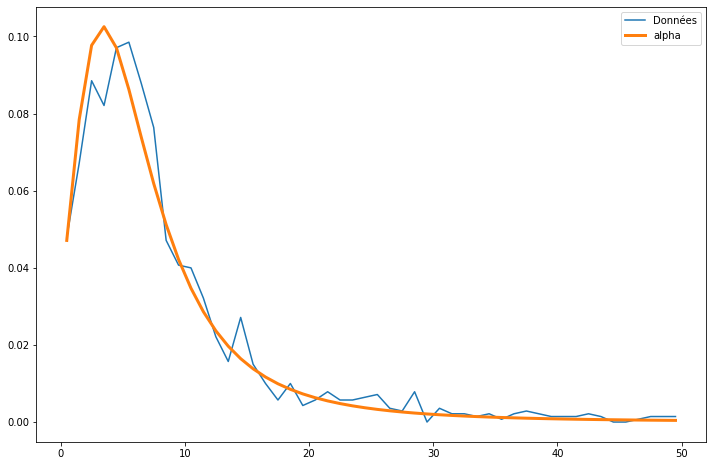

Selected Model :  alpha
Loc. param. :  -8.04069706295669
Scale param. :  39.58492456817473
Other arguments :  (2.8870892521133316,)
SSE :  0.0014962574050984834
27


/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


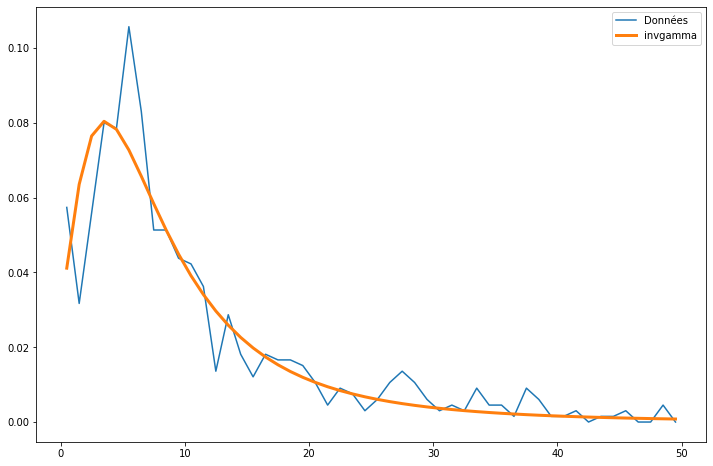

Selected Model :  invgamma
Loc. param. :  -4.037977719831764
Scale param. :  31.984170907949668
Other arguments :  (3.2071163052018843,)
SSE :  0.003849996407854002
28


/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/guera/.local/lib/python3.6/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


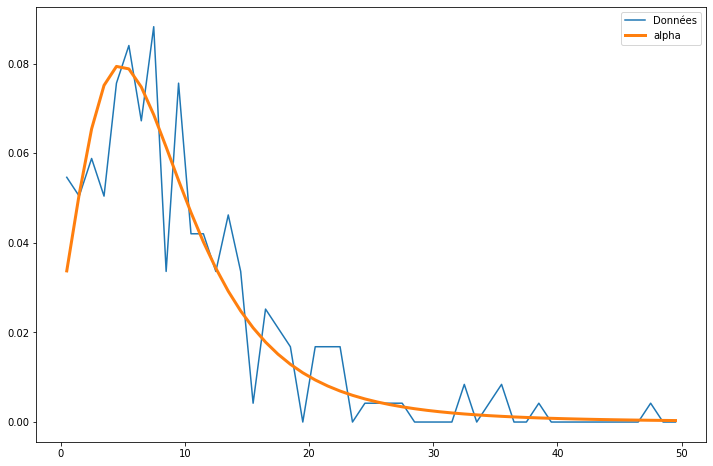

Selected Model :  alpha
Loc. param. :  -14.370271711278502
Scale param. :  82.3295649439032
Other arguments :  (3.8146091096714363,)
SSE :  0.004146115913973187
29


/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/guera/.local/lib/python3.6/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


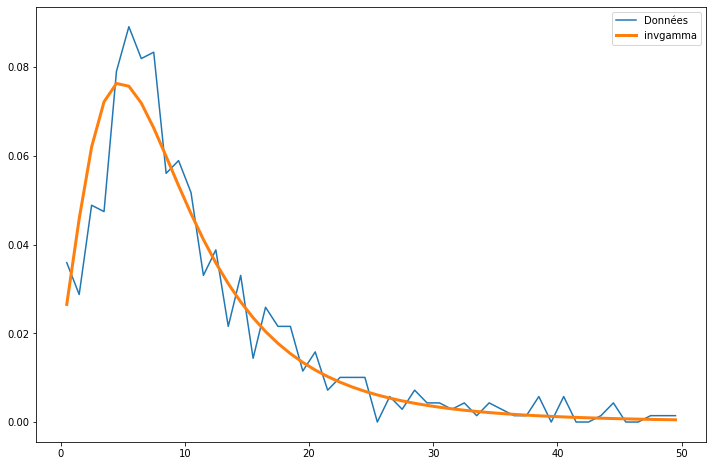

Selected Model :  invgamma
Loc. param. :  -5.421393300405924
Scale param. :  59.56170254830583
Other arguments :  (4.809106417344548,)
SSE :  0.0023449312537583513
30


/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/guera/.local/lib/python3.6/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


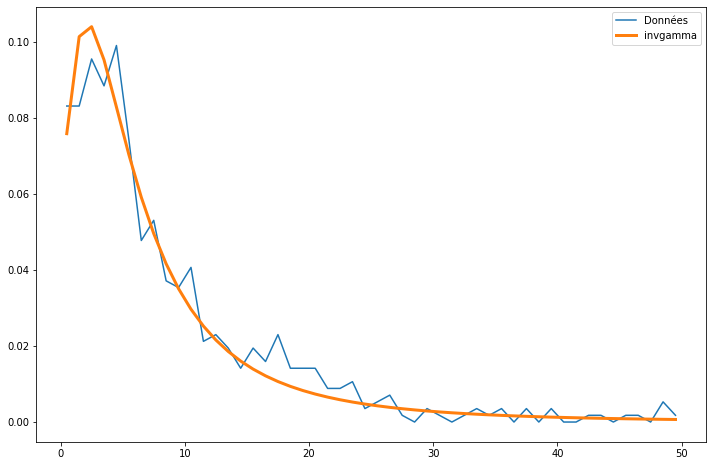

Selected Model :  invgamma
Loc. param. :  -2.7804414992048017
Scale param. :  17.01695136873481
Other arguments :  (2.464598041121517,)
SSE :  0.0015152862296993793
31


/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/guera/.local/lib/python3.6/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1702: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


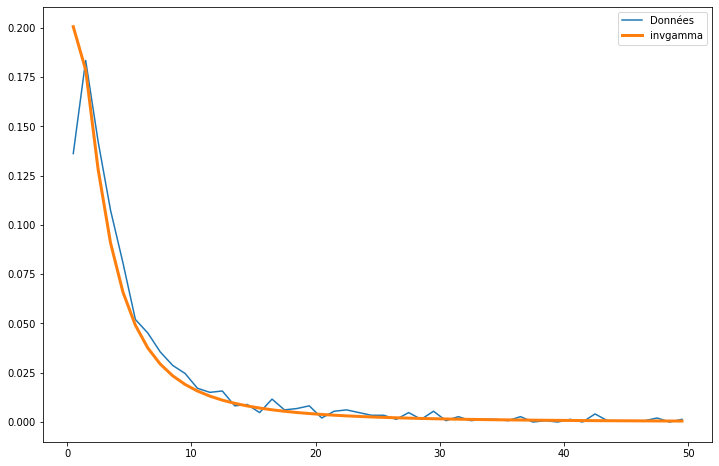

Selected Model :  invgamma
Loc. param. :  -1.1072747698203855
Scale param. :  4.718403115935537
Other arguments :  (1.566784458252498,)
SSE :  0.005177251898183023
32


/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


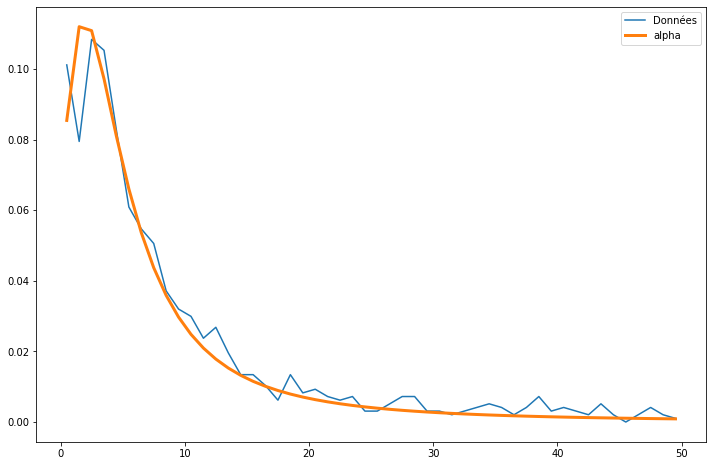

Selected Model :  alpha
Loc. param. :  -4.733097679845329
Scale param. :  16.59305900900226
Other arguments :  (1.6968917735685534,)
SSE :  0.0017923740832789103
33


/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


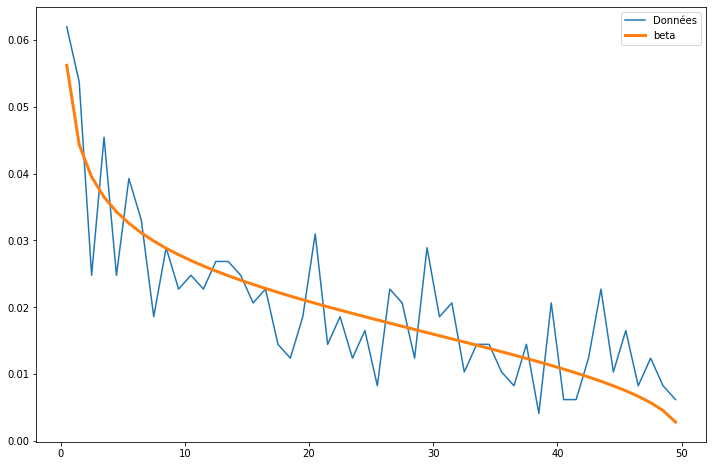

Selected Model :  beta
Loc. param. :  -5.689636467810063e-32
Scale param. :  50.045097938089675
Other arguments :  (0.7924385343345572, 1.4503939043329392)
SSE :  0.002031894028185939
34


/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


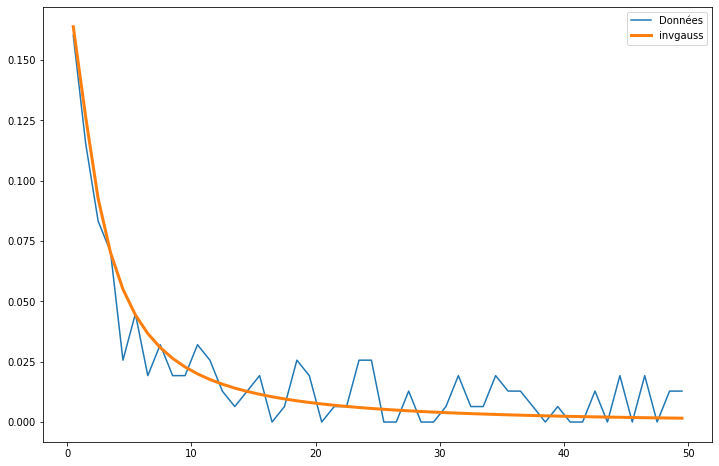

Selected Model :  invgauss
Loc. param. :  -0.8220311147987653
Scale param. :  3.65975998175032
Other arguments :  (3.5928502147341077,)
SSE :  0.005061326513715756
35


/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


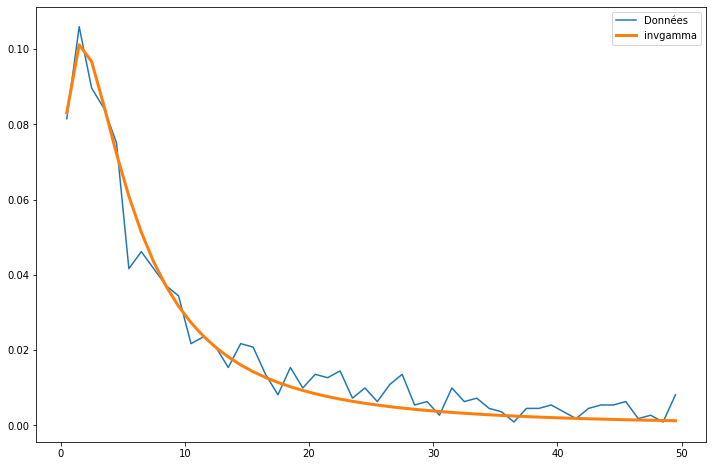

Selected Model :  invgamma
Loc. param. :  -2.135027599049107
Scale param. :  9.939788350374474
Other arguments :  (1.6140136317771892,)
SSE :  0.0011024187049909883
36


/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


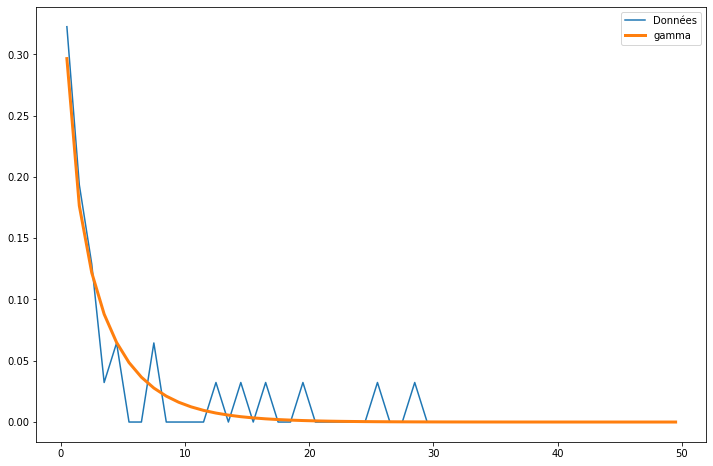

Selected Model :  gamma
Loc. param. :  -2.649155841132923e-27
Scale param. :  4.15934636643681
Other arguments :  (0.7464313153498516,)
SSE :  0.015475381563849313
37


/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/guera/.local/lib/python3.6/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


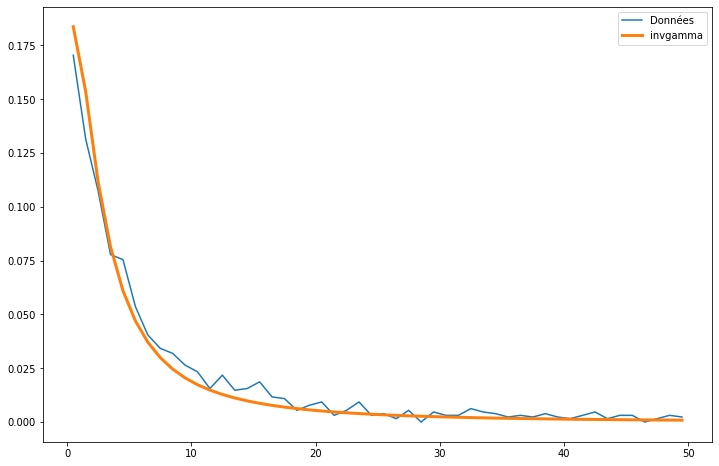

Selected Model :  invgamma
Loc. param. :  -1.1053472441759955
Scale param. :  3.6993871045788804
Other arguments :  (1.1966806669448364,)
SSE :  0.0015092003572315365
38


/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/guera/.local/lib/python3.6/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


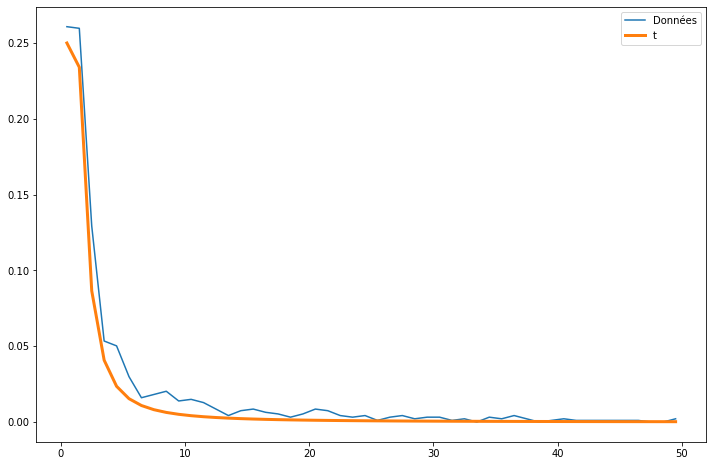

Selected Model :  t
Loc. param. :  0.9638832717364108
Scale param. :  0.9603226361752639
Other arguments :  (0.7862127430924685,)
SSE :  0.004649266519396096
39


/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/guera/.local/lib/python3.6/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1702: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


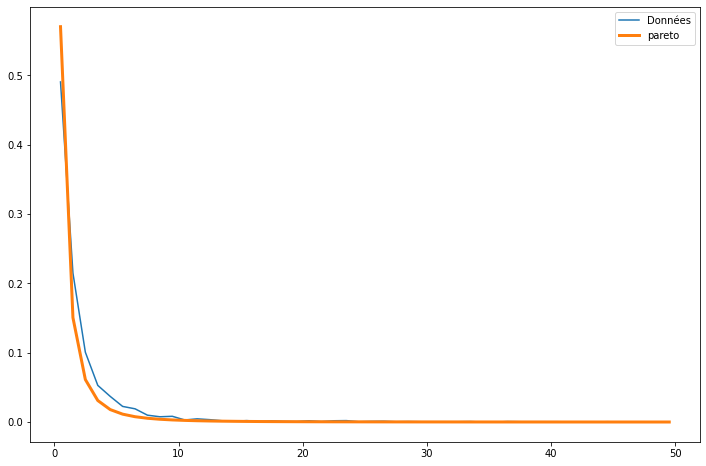

Selected Model :  pareto
Loc. param. :  -1.1449736418314704
Scale param. :  1.144973641750279
Other arguments :  (1.8039698285056485,)
SSE :  0.013237223245611229
40


/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/guera/.local/lib/python3.6/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1702: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


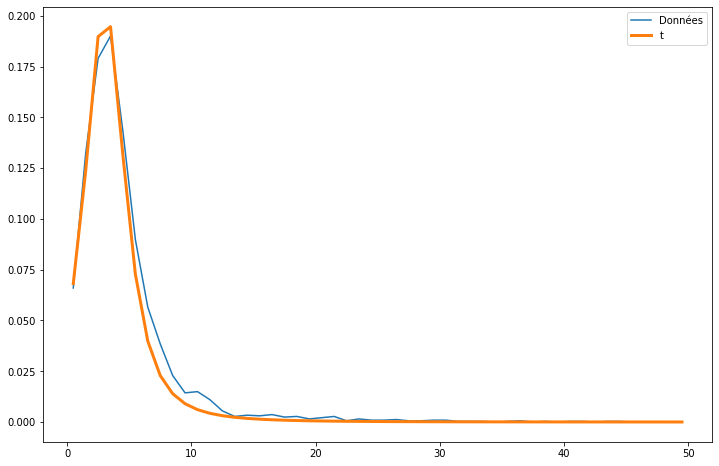

Selected Model :  t
Loc. param. :  3.053700884005469
Scale param. :  1.7369900312531843
Other arguments :  (2.0622252182323617,)
SSE :  0.0014418883677752277
41


/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/guera/.local/lib/python3.6/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


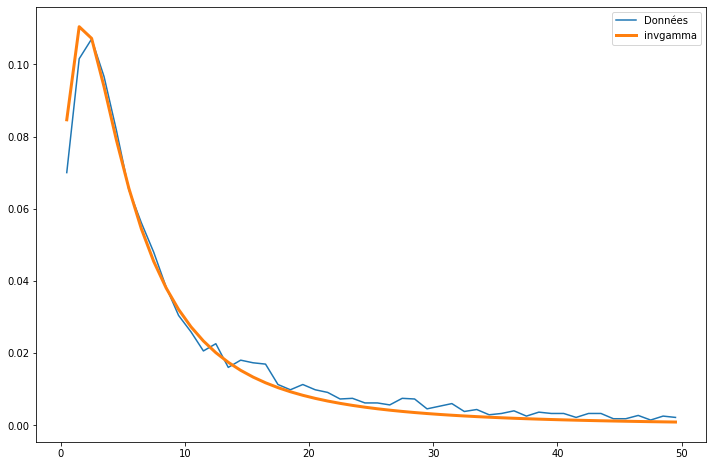

Selected Model :  invgamma
Loc. param. :  -2.068930270661686
Scale param. :  11.1354476908906
Other arguments :  (1.8851185441187948,)
SSE :  0.000504363861128401
42


/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/guera/.local/lib/python3.6/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


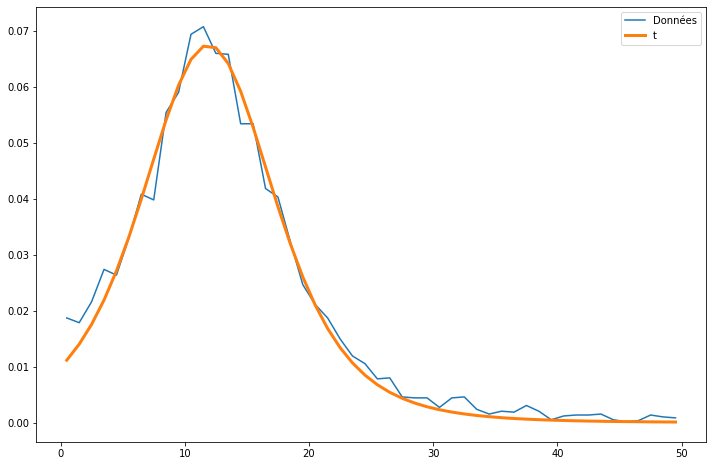

Selected Model :  t
Loc. param. :  11.903033259138294
Scale param. :  5.572422091540101
Other arguments :  (4.244660780801318,)
SSE :  0.00032512652851293623
43


/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/guera/.local/lib/python3.6/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


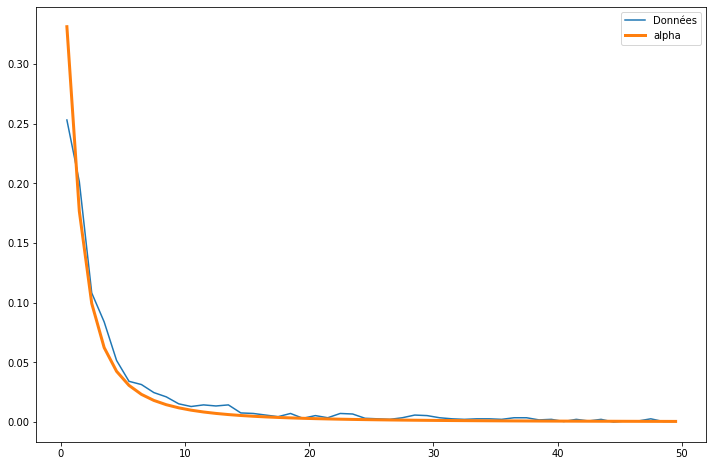

Selected Model :  alpha
Loc. param. :  -0.9297324697064819
Scale param. :  1.6435992356459517
Other arguments :  (7.198806411377422e-08,)
SSE :  0.007841109727389002
44


/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/guera/.local/lib/python3.6/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


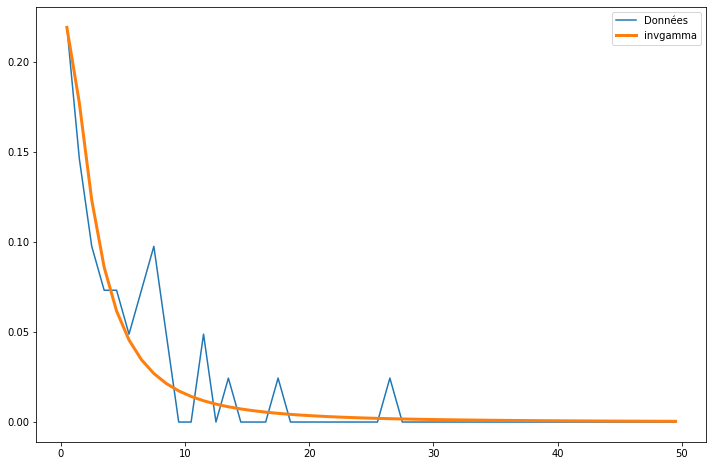

Selected Model :  invgamma
Loc. param. :  -1.2225198466552363
Scale param. :  4.645553498281814
Other arguments :  (1.626321813769139,)
SSE :  0.012480076559799349
45


/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


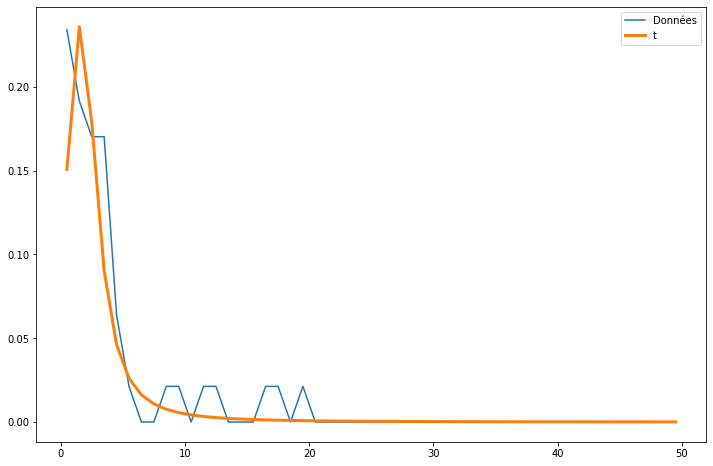

Selected Model :  t
Loc. param. :  1.6363678356814368
Scale param. :  1.4152200367755203
Other arguments :  (1.377926077335267,)
SSE :  0.01847032446960178
46


/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


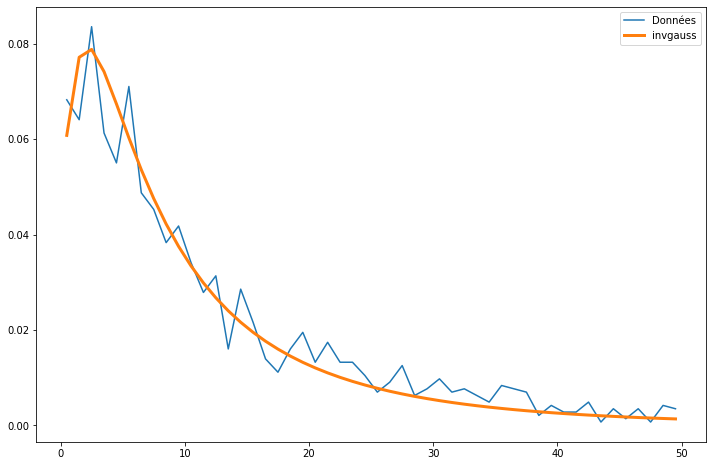

Selected Model :  invgauss
Loc. param. :  -2.030784044923035
Scale param. :  13.880104225852664
Other arguments :  (0.9650988417763691,)
SSE :  0.001213193932933087
47


/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/guera/.local/lib/python3.6/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1702: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


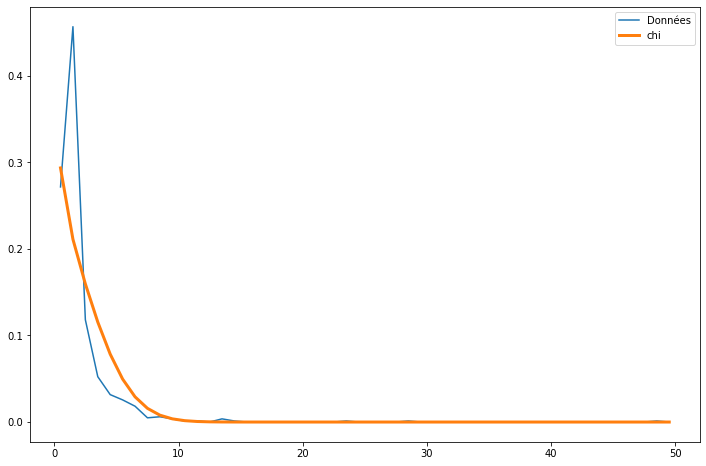

Selected Model :  chi
Loc. param. :  -1.1215258751343944e-28
Scale param. :  3.4792986437410836
Other arguments :  (0.7752903519549516,)
SSE :  0.06952606309016157
48


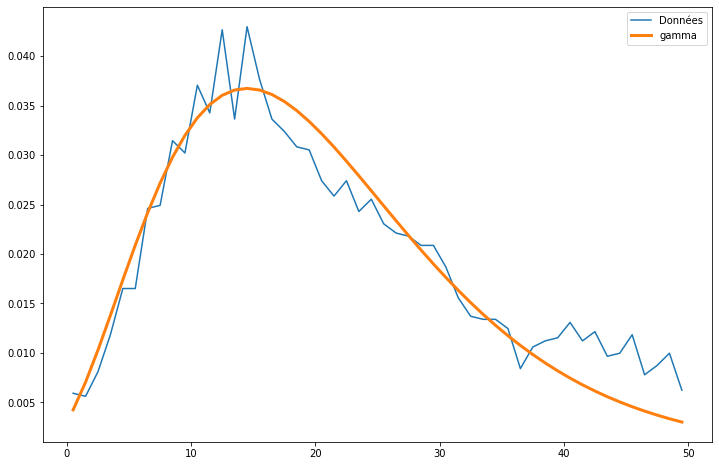

Selected Model :  gamma
Loc. param. :  -3.2751428424290863
Scale param. :  6.260907972133477
Other arguments :  (3.837116535859173,)
SSE :  0.0005604988362950678
49


/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/guera/.local/lib/python3.6/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


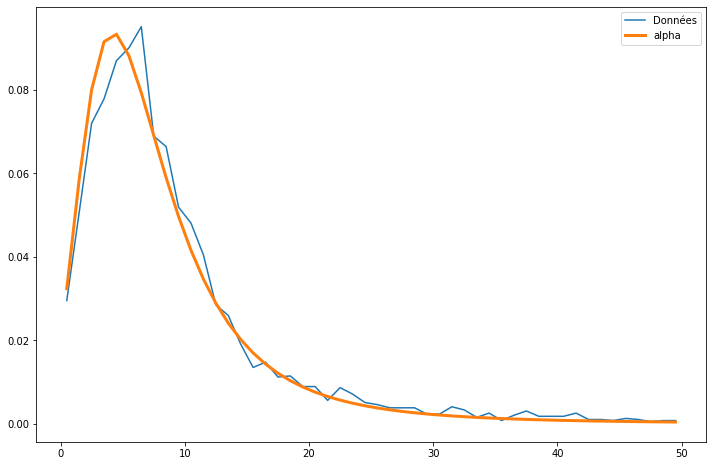

Selected Model :  alpha
Loc. param. :  -9.426982524228166
Scale param. :  50.43145881936183
Other arguments :  (3.160775148374773,)
SSE :  0.0008137885748000945
50


/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/guera/.local/lib/python3.6/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


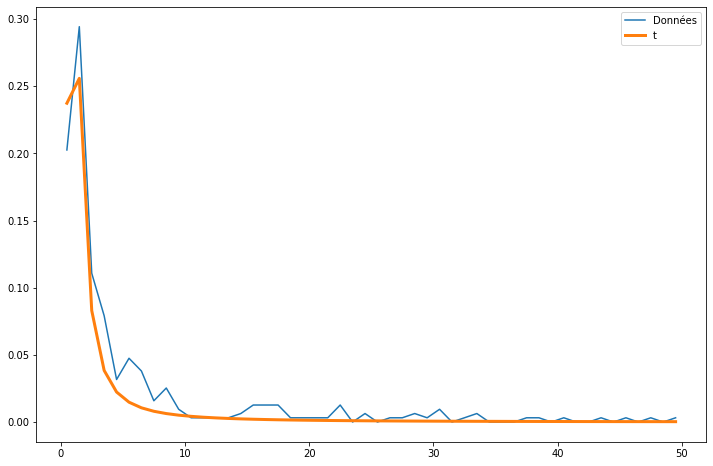

Selected Model :  t
Loc. param. :  1.0321170532906248
Scale param. :  0.8294302874146355
Other arguments :  (0.682210911601996,)
SSE :  0.008237395144300646
51


/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


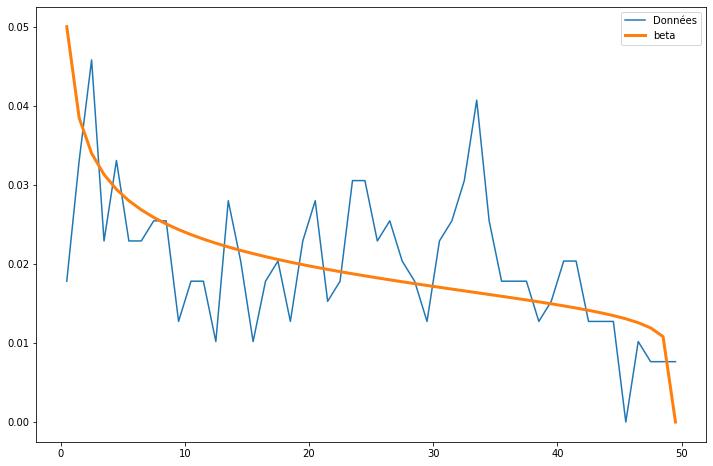

Selected Model :  beta
Loc. param. :  -1.1688788993620811e-23
Scale param. :  49.21788021660798
Other arguments :  (0.7628570080286764, 1.1061369437440622)
SSE :  0.0037317288166881625
52


/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


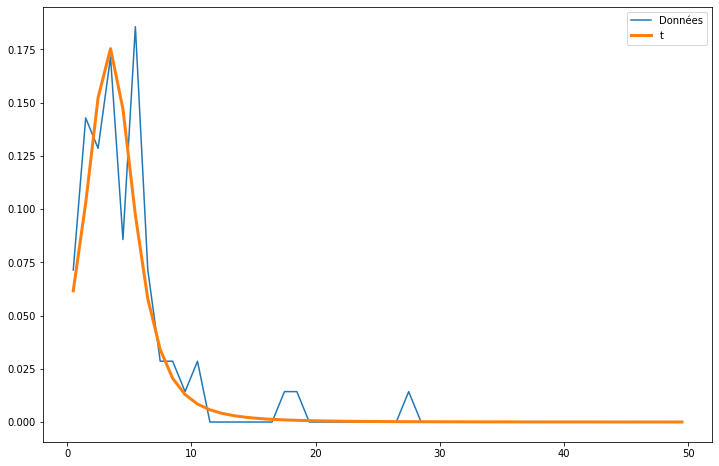

Selected Model :  t
Loc. param. :  3.4410514002796644
Scale param. :  2.057541166215259
Other arguments :  (2.449717850045884,)
SSE :  0.015187367182868615
53


/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


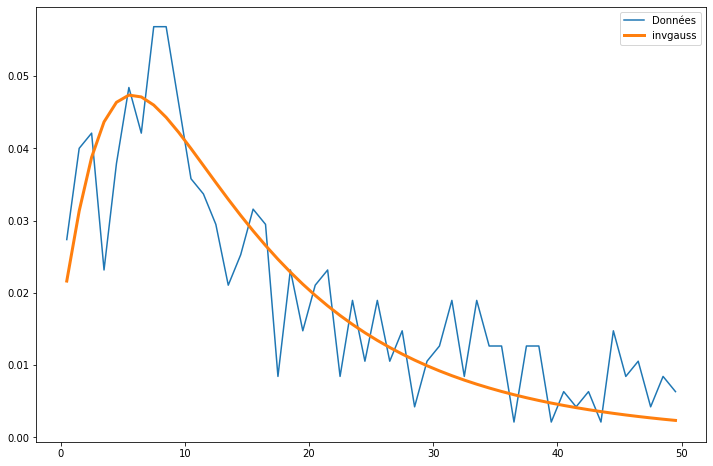

Selected Model :  invgauss
Loc. param. :  -4.42003232014317
Scale param. :  40.59834784394048
Other arguments :  (0.5028730718848458,)
SSE :  0.002442467225006884
54


/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/guera/.local/lib/python3.6/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1702: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


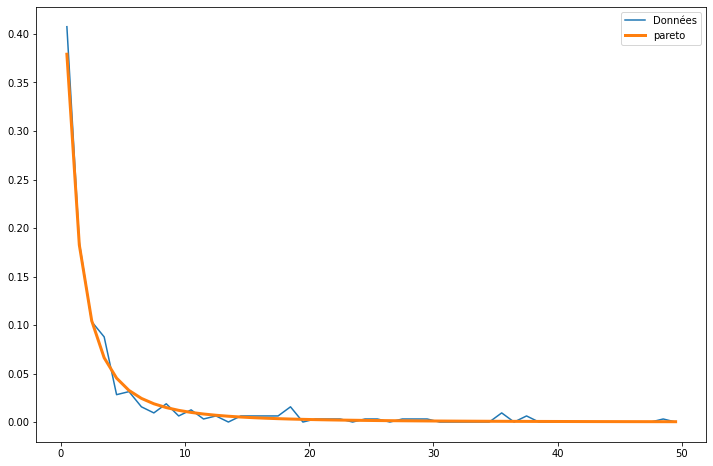

Selected Model :  pareto
Loc. param. :  -2.3166713662995067
Scale param. :  2.316671365754366
Other arguments :  (1.4054412151410665,)
SSE :  0.0021778931132794607
55


/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


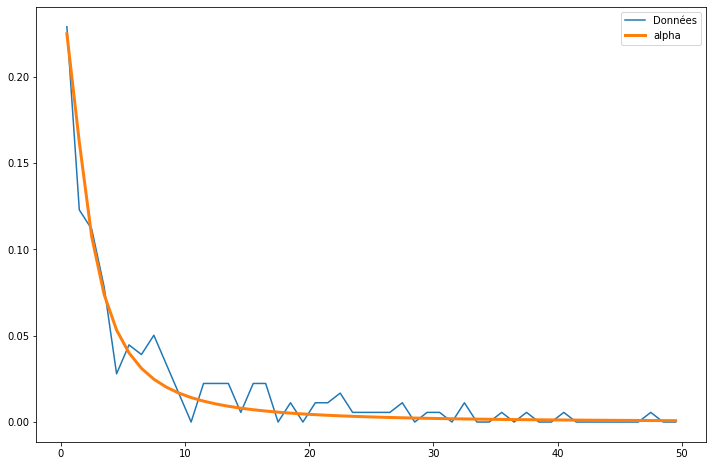

Selected Model :  alpha
Loc. param. :  -1.441137182661289
Scale param. :  2.5937519569189504
Other arguments :  (7.511770624584432e-08,)
SSE :  0.004949124005494365
56


/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/guera/.local/lib/python3.6/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


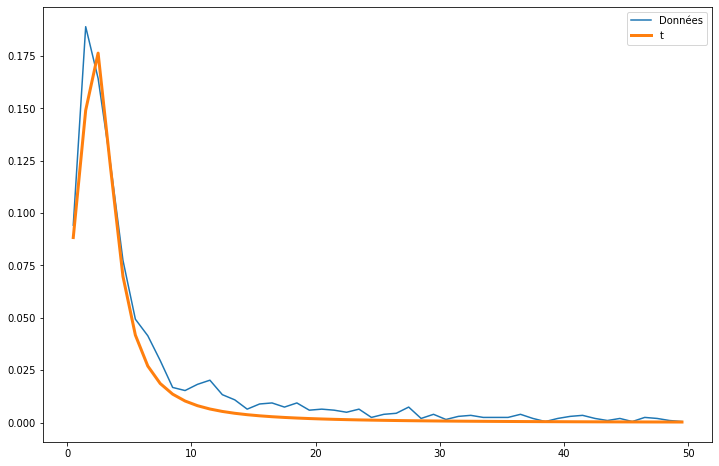

Selected Model :  t
Loc. param. :  2.2892416546686087
Scale param. :  1.7726427505166467
Other arguments :  (0.9798151967108419,)
SSE :  0.003055567643451641
57


/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/guera/.local/lib/python3.6/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1702: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


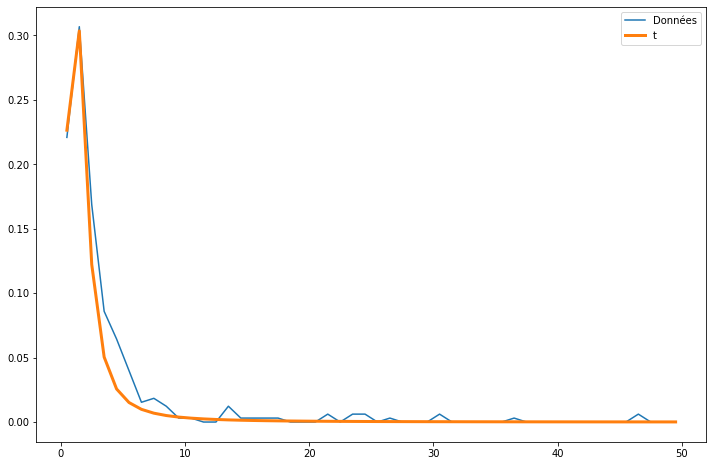

Selected Model :  t
Loc. param. :  1.1908835234834134
Scale param. :  0.9870214262260085
Other arguments :  (1.1583564345947956,)
SSE :  0.006110317919620197
58


/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/guera/.local/lib/python3.6/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


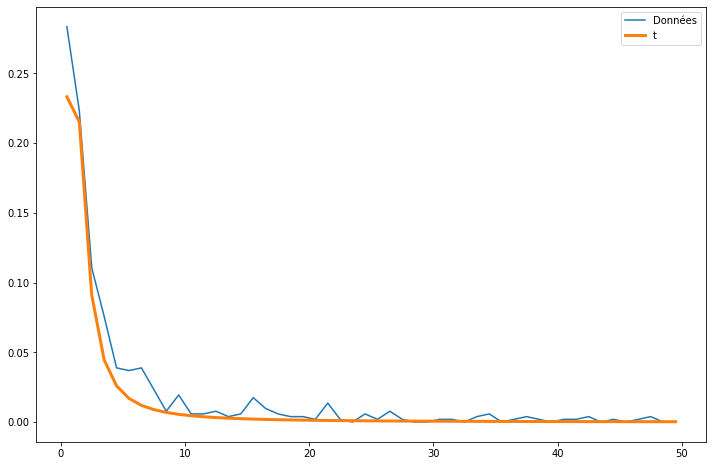

Selected Model :  t
Loc. param. :  0.9432163330527987
Scale param. :  1.1220067328691492
Other arguments :  (0.8298677480287735,)
SSE :  0.006339126395513729
59


/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


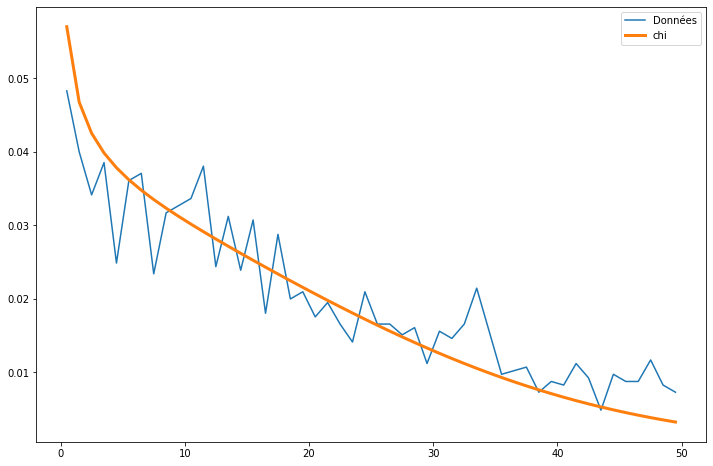

Selected Model :  chi
Loc. param. :  -1.2547049313107418e-28
Scale param. :  24.52130327569757
Other arguments :  (0.8209892957891687,)
SSE :  0.0011694272376711252
60


/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/guera/.local/lib/python3.6/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1702: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


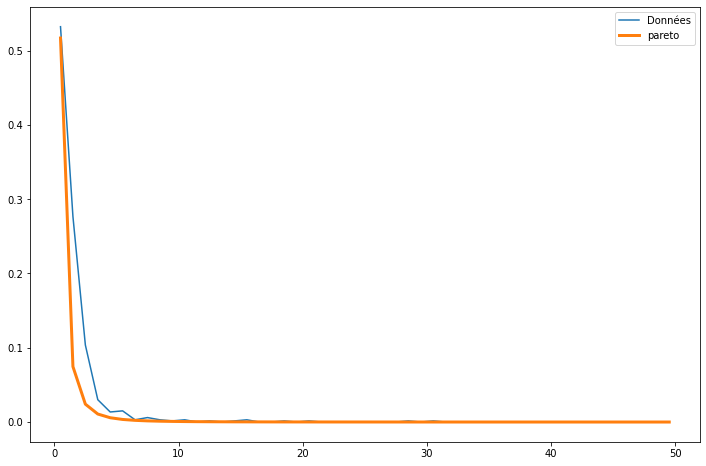

Selected Model :  pareto
Loc. param. :  -0.49844201771365393
Scale param. :  0.4984420125833917
Other arguments :  (1.7891222720296664,)
SSE :  0.04802354302802188
61


/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


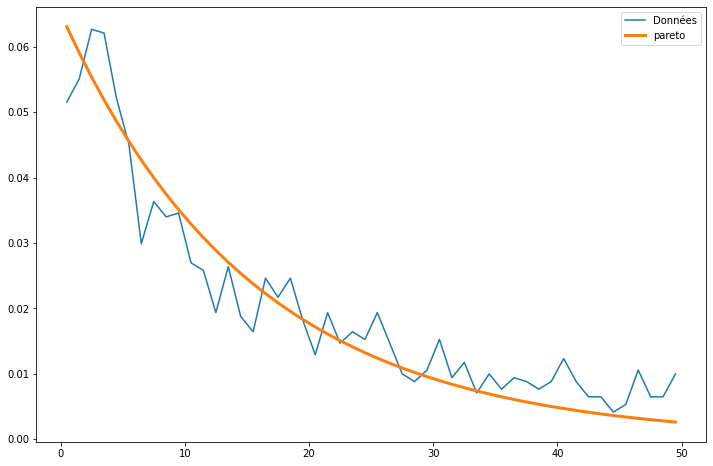

Selected Model :  pareto
Loc. param. :  -1638640780.7268014
Scale param. :  1638640780.7268014
Other arguments :  (106779649.2090806,)
SSE :  0.0012263846699263035
62


/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/guera/.local/lib/python3.6/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


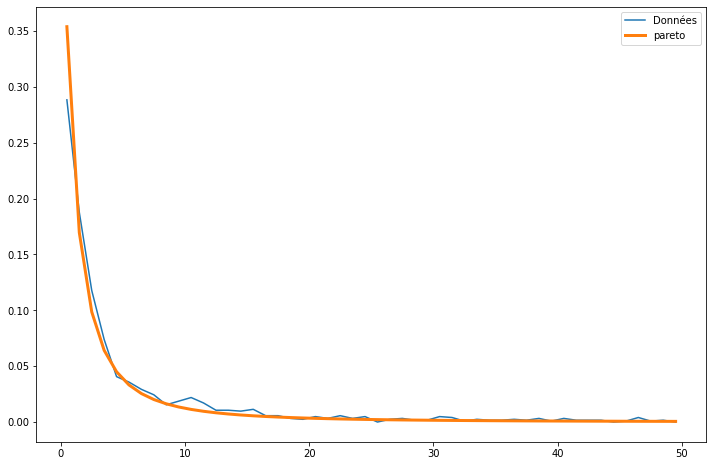

Selected Model :  pareto
Loc. param. :  -1.852320073184842
Scale param. :  1.8523200730787162
Other arguments :  (1.0765791163661325,)
SSE :  0.005469654698018943
63


/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


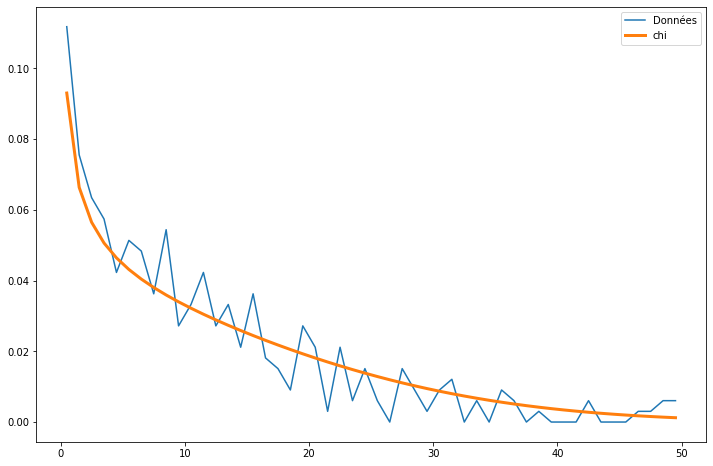

Selected Model :  chi
Loc. param. :  -8.966259841218239e-29
Scale param. :  20.447632298332238
Other arguments :  (0.6945800674520861,)
SSE :  0.002484382719017732
64


/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/guera/.local/lib/python3.6/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1702: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


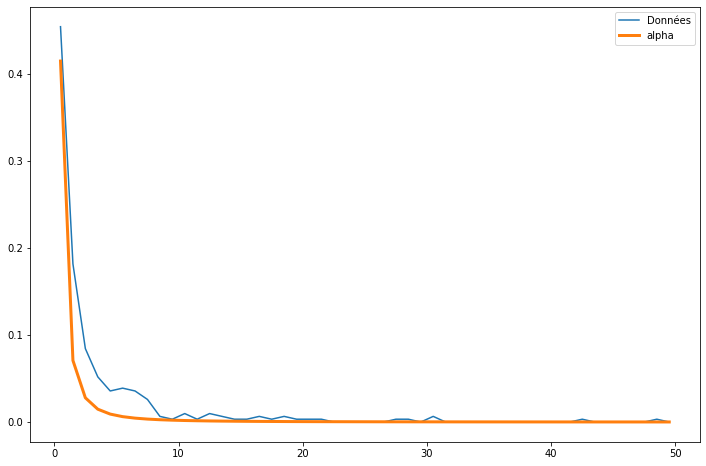

Selected Model :  alpha
Loc. param. :  -0.1694250578915828
Scale param. :  0.249921730391565
Other arguments :  (1.3330694569530537e-07,)
SSE :  0.02211581447116981
65


/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


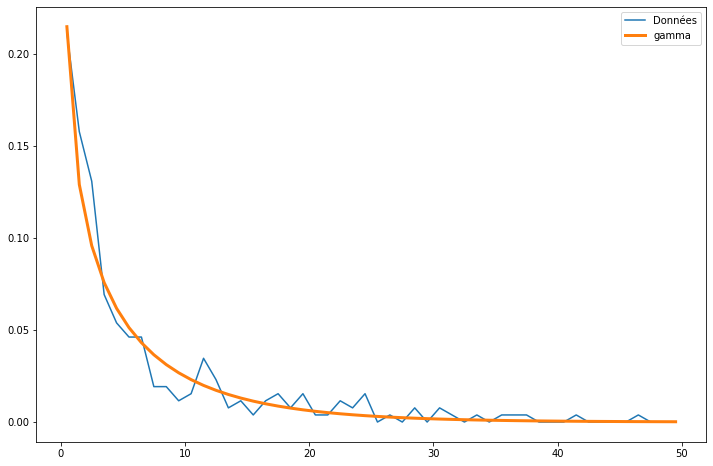

Selected Model :  gamma
Loc. param. :  -8.333512661111968e-28
Scale param. :  8.813948226960829
Other arguments :  (0.6393079725169273,)
SSE :  0.003788716695537526
66


/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/guera/.local/lib/python3.6/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1702: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


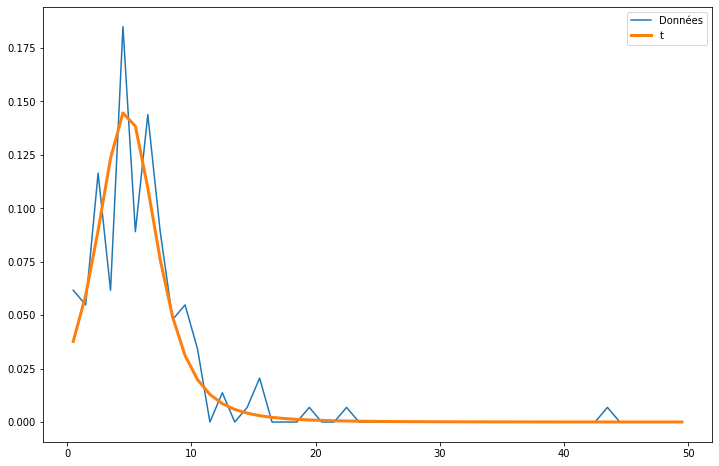

Selected Model :  t
Loc. param. :  4.790175128786226
Scale param. :  2.5190969313067315
Other arguments :  (2.9848180337498205,)
SSE :  0.01197349705541767
67


/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/guera/.local/lib/python3.6/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1702: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


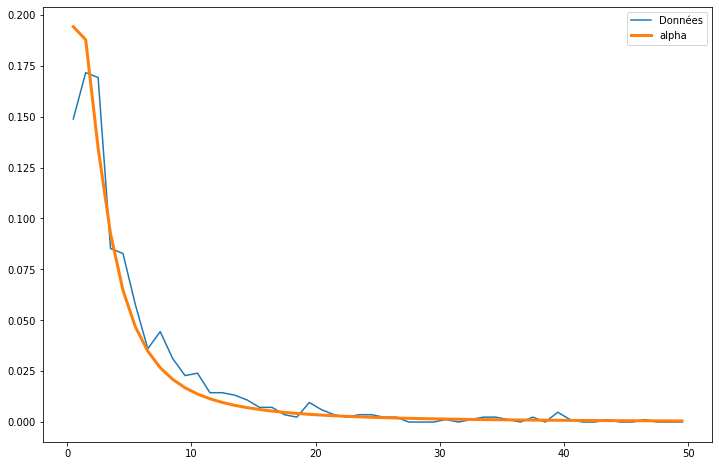

Selected Model :  alpha
Loc. param. :  -2.418515618356214
Scale param. :  7.588888736617967
Other arguments :  (1.4310112039098002,)
SSE :  0.004740510180453442
68


/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/guera/.local/lib/python3.6/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


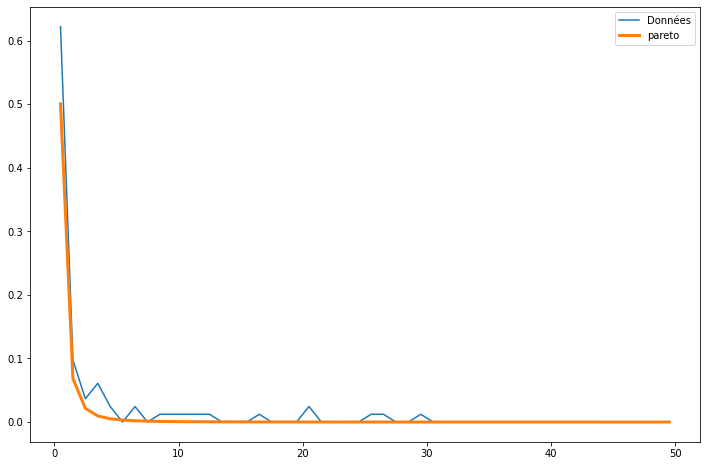

Selected Model :  pareto
Loc. param. :  -0.4634117068179011
Scale param. :  0.46341170482869765
Other arguments :  (1.7986388288061006,)
SSE :  0.02120402584625746
69


/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/guera/.local/lib/python3.6/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


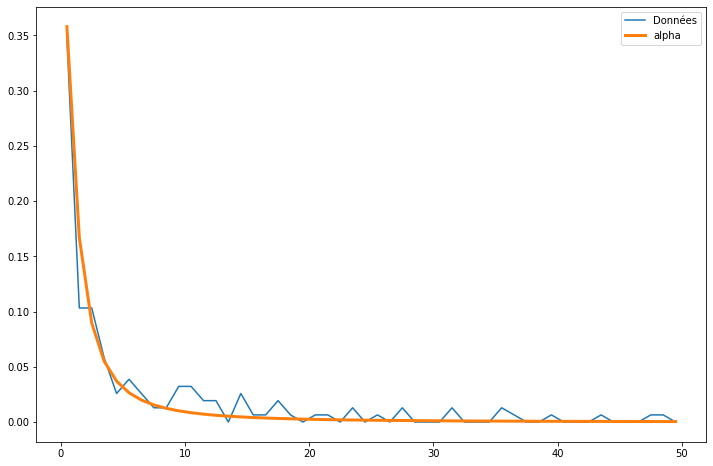

Selected Model :  alpha
Loc. param. :  -0.8522241466589393
Scale param. :  1.372627496870293
Other arguments :  (1.2831671406743596e-08,)
SSE :  0.00760221158665752
70


/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/guera/.local/lib/python3.6/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1702: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


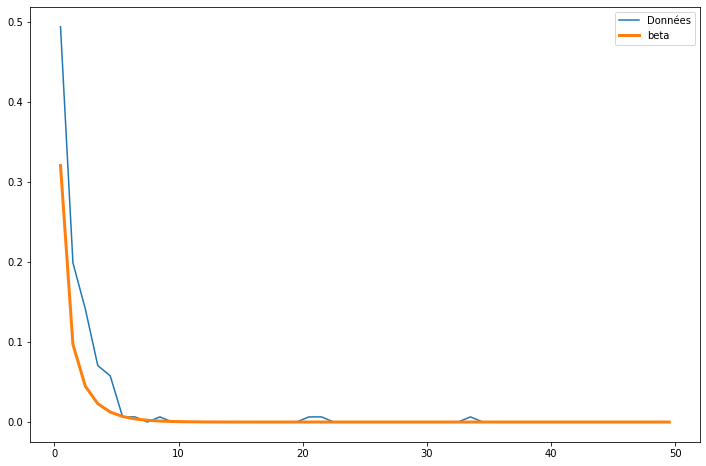

Selected Model :  beta
Loc. param. :  -8.516917179135663e-24
Scale param. :  36.74109190514912
Other arguments :  (0.270844482131657, 15.060910158953051)
SSE :  0.05418834712562772
71


/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/guera/.local/lib/python3.6/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


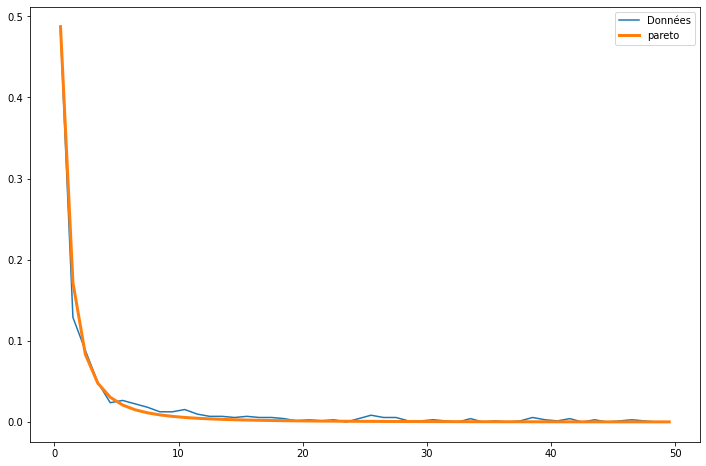

Selected Model :  pareto
Loc. param. :  -1.321736064105126
Scale param. :  1.3217360608872522
Other arguments :  (1.3831563387693504,)
SSE :  0.002535242335753886
72


/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


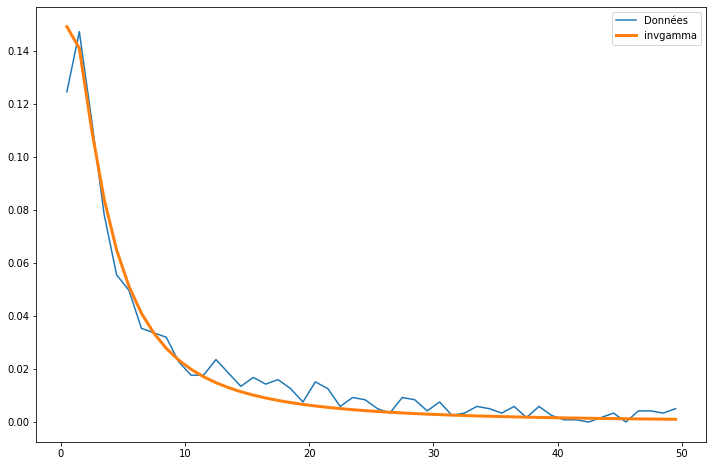

Selected Model :  invgamma
Loc. param. :  -1.2419024066155608
Scale param. :  4.5422205797598725
Other arguments :  (1.2197963215210503,)
SSE :  0.0014749500279085273
73


/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/guera/.local/lib/python3.6/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


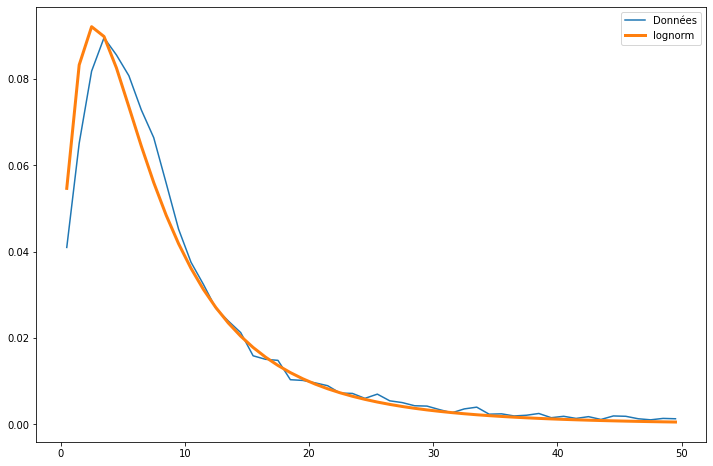

Selected Model :  lognorm
Loc. param. :  -1.237757517830067
Scale param. :  7.441352469648895
Other arguments :  (0.7983188907559724,)
SSE :  0.0009618125210809578
74


/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/guera/.local/lib/python3.6/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1702: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


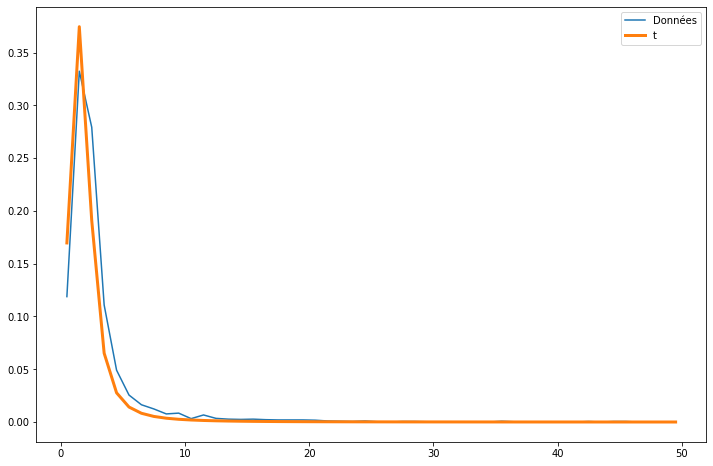

Selected Model :  t
Loc. param. :  1.5529477439103752
Scale param. :  0.9101936755646245
Other arguments :  (1.5341335778720357,)
SSE :  0.015069989906096426
75


/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/guera/.local/lib/python3.6/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1702: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


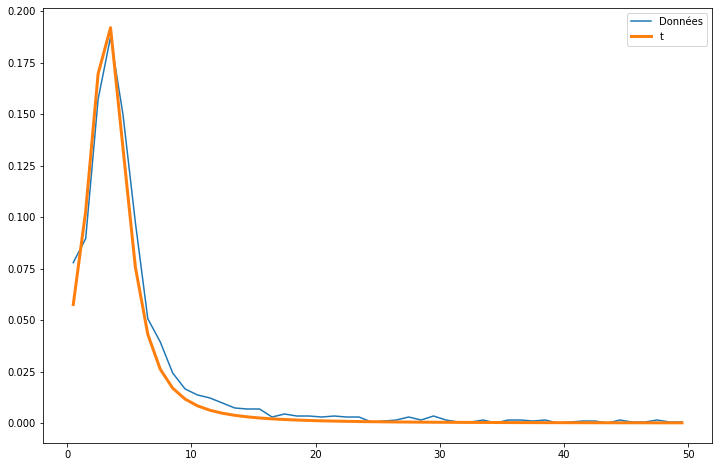

Selected Model :  t
Loc. param. :  3.23716052498862
Scale param. :  1.7347669563249626
Other arguments :  (1.4586855244412744,)
SSE :  0.002008289855840267
76


/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/guera/.local/lib/python3.6/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1702: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


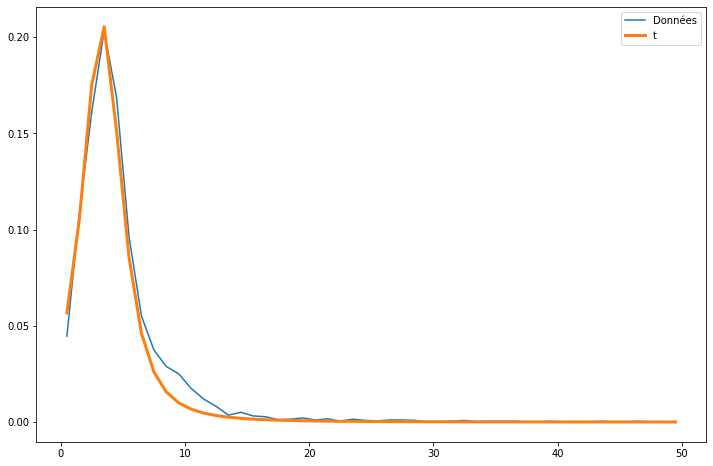

Selected Model :  t
Loc. param. :  3.3312051470617563
Scale param. :  1.7111191011704625
Other arguments :  (2.02962840231255,)
SSE :  0.001615298162123411
77


/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/guera/.local/lib/python3.6/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1702: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


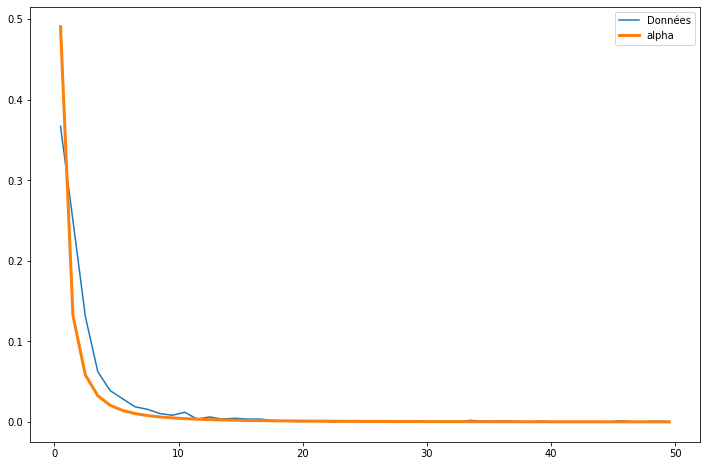

Selected Model :  alpha
Loc. param. :  -0.3925958894986685
Scale param. :  0.6270950970722853
Other arguments :  (2.3354060304413526e-07,)
SSE :  0.03619036621762084
78


/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/guera/.local/lib/python3.6/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


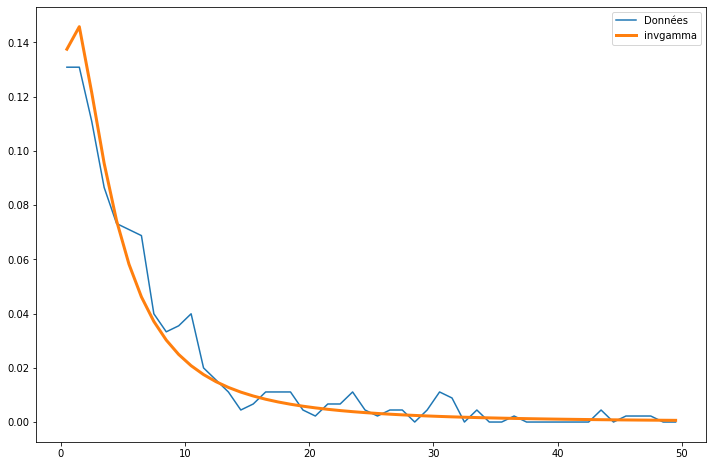

Selected Model :  invgamma
Loc. param. :  -1.6753856530182705
Scale param. :  7.658437911215588
Other arguments :  (1.7762337703817221,)
SSE :  0.0019972971022585786
79


/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


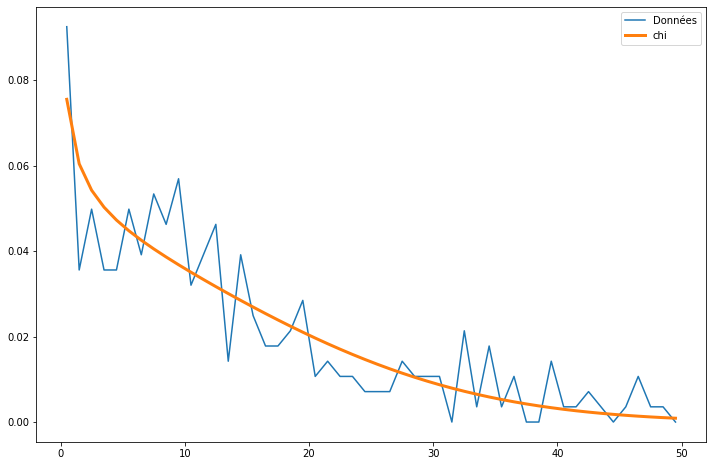

Selected Model :  chi
Loc. param. :  -6.22349246687736e-29
Scale param. :  18.665810660943695
Other arguments :  (0.7997928456421945,)
SSE :  0.0037593221481982317
80


/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/guera/.local/lib/python3.6/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


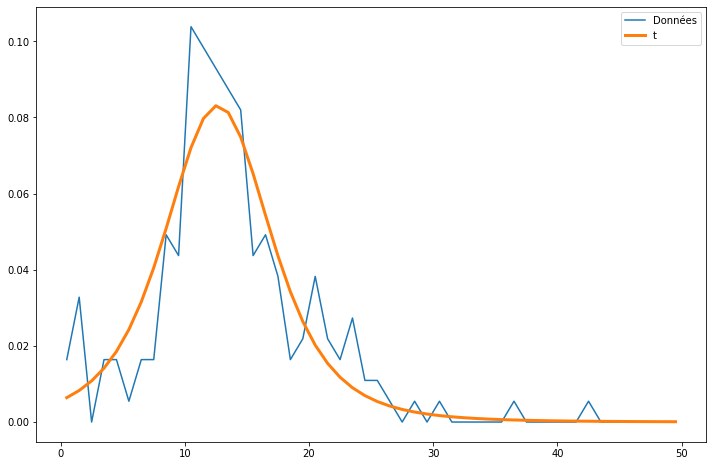

Selected Model :  t
Loc. param. :  12.657924411558357
Scale param. :  4.48464702924911
Other arguments :  (3.649518673420542,)
SSE :  0.005589207268077877
81


/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


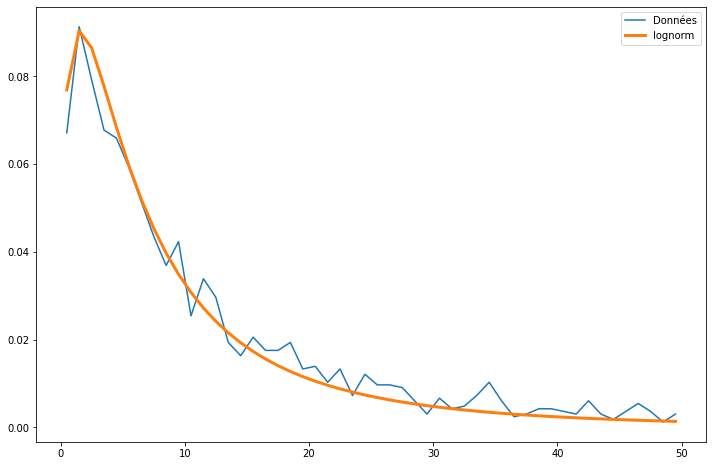

Selected Model :  lognorm
Loc. param. :  -0.8522290868969838
Scale param. :  7.281899693550262
Other arguments :  (1.0435160082372976,)
SSE :  0.0007274130321349217
82


/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


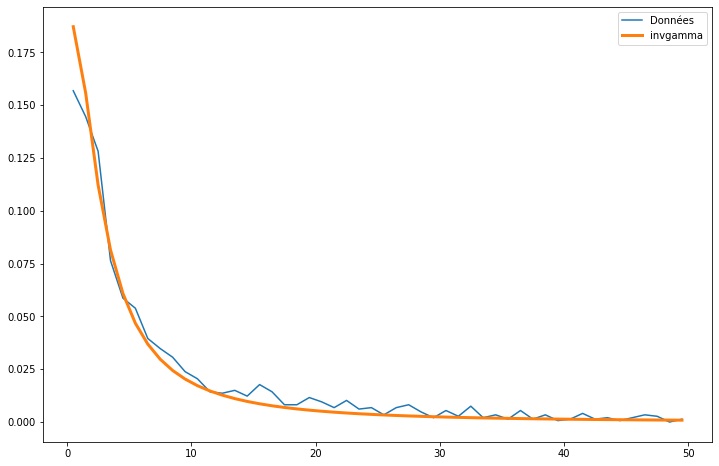

Selected Model :  invgamma
Loc. param. :  -1.0443271944471089
Scale param. :  3.5438636310095264
Other arguments :  (1.174548627682939,)
SSE :  0.0018676004382197737
83


/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


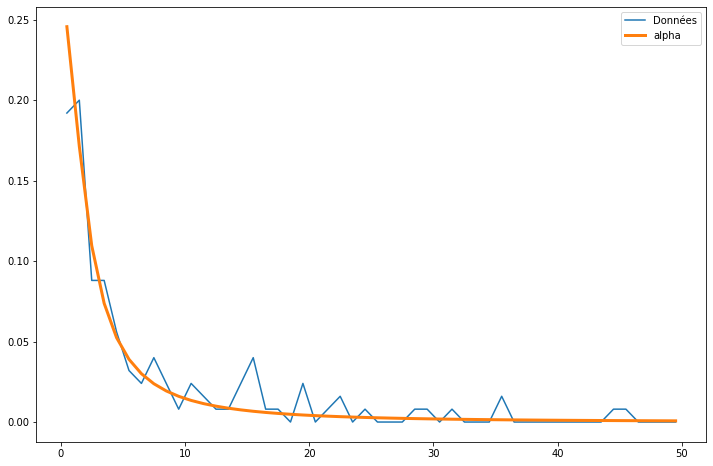

Selected Model :  alpha
Loc. param. :  -1.2664970127628337
Scale param. :  2.3784453025940344
Other arguments :  (3.69715781387396e-07,)
SSE :  0.007449694803814365
84


/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/guera/.local/lib/python3.6/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1702: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


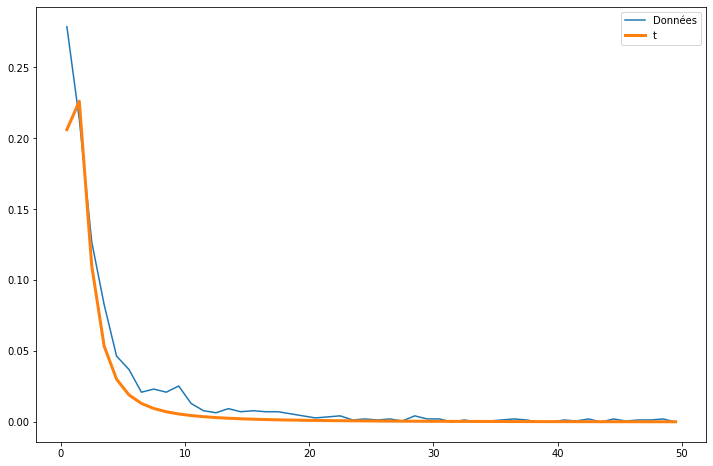

Selected Model :  t
Loc. param. :  1.0836623060932251
Scale param. :  1.2568299641236056
Other arguments :  (0.9621734549400048,)
SSE :  0.008350702401670546
85
86
87


/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/guera/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


In [ ]:
dist_names = ['norm', 'beta','gamma', 'pareto', 't', 'lognorm', 'invgamma', 'invgauss',  'loggamma', 'alpha', 'chi', 'chi2']

model=[np.array([]) for i in range(100)]

n=len(NAF)

for i in range(n):
    print(i)
    j=NAF[i]
    if len(Tab[int(j)]) != 50:
        continue
    try:
        data=df_conso_bis.loc[df_conso_bis['X']<50].loc[(j,),'X'].values.astype(int)
    except:
        continue
    x=bins
    y=Tab[int(j)]/len(data)
    
    sse = np.inf
    sse_thr = 0.0010

    # Pour chaque distribution
    for name in dist_names:

        # Modéliser
        dist = getattr(scipy.stats, name)
        param = dist.fit(data)

        # Paramètres
        loc = param[-2]
        scale = param[-1]
        arg = param[:-2]

        # PDF
        pdf = dist.pdf(x, *arg, loc=loc, scale=scale)
        # SSE
        model_sse = np.sum((y - pdf)**2)

        # Si le SSE est ddiminué, enregistrer la loi
        if model_sse < sse :
            best_pdf = pdf
            sse = model_sse
            best_loc = loc
            best_scale = scale
            best_arg = arg
            best_name = name

        # Si en dessous du seuil, quitter la boucle
        if model_sse < sse_thr :
            break
            
    plt.figure(figsize=(12,8))
    plt.plot(x, y, label="Données")
    plt.plot(x, best_pdf, label=best_name, linewidth=3)
    plt.legend(loc='upper right')
    plt.show()

    # Détails sur la loi sélectionnée
    print("Selected Model : ", best_name)
    print("Loc. param. : ", best_loc)
    print("Scale param. : ", best_scale)
    print("Other arguments : ", best_arg)
    print("SSE : ", sse)
    
    model[int(j)]=(best_name,best_loc,best_scale,best_arg)

In [85]:
len(model[2])

NameError: name 'model' is not defined